# Práctica de Machine Learning de Juan José de la Mora

Iré explicando paso a paso cada acción y justificaré mis decisiones en pequeños mensajes intermedios. 


## 1. Concentraré en este paso, todas las librerías que voy a usar: 


In [2210]:
import numpy as np # Requiero Numpy para el manejo de matrices, álgebra lineal y arreglos
import pandas as pd # Me da acceso a las herramientas para el análisis de datos

import matplotlib.pyplot as plt # Me ayudará con las instrucciones necesarias para hacer gráficos
from matplotlib.colors import ListedColormap # Me cpermite dar colores a las gráficas y mostrar los datos de forma clara
# A partir de esta línea, los gráficos de matplotlib aparecerán directamente después de donde se llame la función plot.
%matplotlib inline 

cm = plt.cm.RdBu # Selección del mapa de color 
cm_bright = ListedColormap(['#FF0000', '#0000FF']) ## Selección del mapa de color 

import warnings # Evitar los warnings 
warnings.filterwarnings('ignore')

import graphviz # Visualización de los árboles de manera gráfica e incluye el cálculo del GINI

from sklearn.model_selection import train_test_split ## Para obtener la muestra para train y para split

from feature_engine.encoding import OneHotEncoder ## Para poder hacer category encoding usando media
import category_encoders as ce

from sklearn import preprocessing ## Funciones para manipular vectores para representarlos en formas más fáciles de interpretar.

import seaborn as sns ## Para hacer la matriz de correlación

from sklearn.model_selection import GridSearchCV ## Para controlar el Cross Validation
from sklearn.linear_model import Lasso ## Para descartar variables y hacer la regresión por Lasso

from sklearn.feature_selection import f_regression, mutual_info_regression ## para hacer pruebas de filtrado

from sklearn.feature_selection import f_classif, mutual_info_classif ## para clasificar variables (clasificarlas)

from sklearn.metrics import mean_squared_error ## Evaluar el MSE y obtener los coeficientes del modelo lineal

from sklearn.model_selection import StratifiedKFold ## Para hacer la validación cruzada 

from sklearn.neighbors import KNeighborsClassifier ## Para aplicar KNN

from sklearn.linear_model import LinearRegression ## Para hacer la regresión lineal 

from sklearn.preprocessing import PolynomialFeatures ## Oara manejar varias variables 

from sklearn.tree import DecisionTreeClassifier ## para Clasificar usando Random Tree 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import KFold ## Para clasificar las variables
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor



## 2. Ahora, cargo la información con la que voy a trabajar --> 


In [2433]:
data = pd.read_table('./data/airbnb-listings-extract.csv',sep=';', decimal='.', on_bad_lines='skip')
print("El data frame tiene el siguiente shape --> ", data.shape)
print("Voy a visualizar las primeras 5 líneas --> \n", data.head())

El data frame tiene el siguiente shape -->  (14780, 89)
Voy a visualizar las primeras 5 líneas --> 
          ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2  17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3   5398030   https://www.airbnb.com/rooms/5398030  20170407214050   
4  18104606  https://www.airbnb.com/rooms/18104606  20170407214050   

  Last Scraped                                 Name  \
0   2017-03-07       The Loft-Full Bath-Deck w/View   
1   2017-04-08           Claris I, Friendly Rentals   
2   2017-04-08  Style Terrace Red, Friendly Rentals   
3   2017-04-08    Picasso Suite 1.4 Paseo de Gracia   
4   2017-04-08       Smart City Centre Apartment II   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed

## 3. Analizo los datos 


Primero veo el nombre de las columnas:


In [2434]:
lista_columnas = list(data.columns.values)
print("La lista de los nombres de las columnas es esta --> ", lista_columnas)

La lista de los nombres de las columnas es esta -->  ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Gue

In [2435]:
print(data.shape[0])

14780


Existen algunas columnas que creo que se pueden eliminar, como serían los URL's de la imagen, "Thumbnail URL", "Medium URL". También información repetitiva de la misma característica, como  "Host URL", "Host NAme", "Scrape ID", "Last Scraped", "Name", "Summary".   

No hago nada por el momento, sigo revisando los datos desde otro punto de vista. 


### 3.1 Voy a validar primero que haya suficiente información. Voy a buscar cuántos NAs hay por columna y en principio, quiero saber cuáles están por encima del 70% de información -- Máximo X% de NAs (que establezco en la variabla max_na)


In [2436]:
max_NA = 30

In [2437]:
NAs_columns = list()  # Genero una lista para hacer el análisis
print ("Columna --> Número de NA --> %NAs en total datos ")
for name in lista_columnas:
    print (name, " --> ", data[name].isna().sum(), " --> ", (data[name].isna().sum()*100/data.shape[0]).round(2))
    NA_count = {"Columna": name, 'NA': data[name].isna().sum(), 'NA%': (data[name].isna().sum()*100/data.shape[0]).round(2)}
    NAs_columns.append(NA_count)


df_NA = pd.DataFrame(NAs_columns) 
df_NA # Genero un Dataframe para poder manipularlo en el análisis 

Columna --> Número de NA --> %NAs en total datos 
ID  -->  0  -->  0.0
Listing Url  -->  0  -->  0.0
Scrape ID  -->  0  -->  0.0
Last Scraped  -->  0  -->  0.0
Name  -->  1  -->  0.01
Summary  -->  591  -->  4.0
Space  -->  3892  -->  26.33
Description  -->  6  -->  0.04
Experiences Offered  -->  0  -->  0.0
Neighborhood Overview  -->  5646  -->  38.2
Notes  -->  9136  -->  61.81
Transit  -->  5714  -->  38.66
Access  -->  6462  -->  43.72
Interaction  -->  6552  -->  44.33
House Rules  -->  5161  -->  34.92
Thumbnail Url  -->  2820  -->  19.08
Medium Url  -->  2820  -->  19.08
Picture Url  -->  19  -->  0.13
XL Picture Url  -->  2820  -->  19.08
Host ID  -->  0  -->  0.0
Host URL  -->  0  -->  0.0
Host Name  -->  3  -->  0.02
Host Since  -->  3  -->  0.02
Host Location  -->  43  -->  0.29
Host About  -->  5241  -->  35.46
Host Response Time  -->  1899  -->  12.85
Host Response Rate  -->  1899  -->  12.85
Host Acceptance Rate  -->  14741  -->  99.74
Host Thumbnail Url  -->  3  -->  0.0

,Columna,NA,NA%
0,ID,0,0.00
1,Listing Url,0,0.00
2,Scrape ID,0,0.00
3,Last Scraped,0,0.00
4,Name,1,0.01
5,Summary,591,4.00
6,Space,3892,26.33
7,Description,6,0.04
8,Experiences Offered,0,0.00
9,Neighborhood Overview,5646,38.20


Tengo las siguientes columnas con más del max_NA% -->

In [2438]:
df_NA = df_NA[df_NA["NA%"] > max_NA]
print("En total tengo ", df_NA.shape[0], " columnas con más del ", max_NA,"% de valores con NA")
lista_columnas_muchos_NA = list(df_NA['Columna'])
print("Las columnas que cumplen este criterio son --> ", lista_columnas_muchos_NA)
df_NA

En total tengo  17  columnas con más del  30 % de valores con NA
Las columnas que cumplen este criterio son -->  ['Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 'Host Acceptance Rate', 'Neighbourhood', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names']


,Columna,NA,NA%
9,Neighborhood Overview,5646,38.20
10,Notes,9136,61.81
11,Transit,5714,38.66
12,Access,6462,43.72
13,Interaction,6552,44.33
14,House Rules,5161,34.92
24,Host About,5241,35.46
27,Host Acceptance Rate,14741,99.74
35,Neighbourhood,5229,35.38
55,Square Feet,14182,95.95


Al analizar estas columnas, me preocupa la medida de square feet, pues la considero importante para calcular el precio y aporta muy poca información. La eliminaré.

Neighbourhood es otra variable que me preocupa que también considero muy valiosa. Esa se encuentra con el 38% de NAs. Esta está más cercana al 30%, es probable que la mantenga. 

## 3.2 Ahora, voy a analizar en más detalle los datos disponibles -->

Encuentro algunos temas interesantes: 
 - Parece que la mayor parte de la información es de España
 - En principio, parece que hay una mayor cantidad de información sobre Madrid
 - Neighbourhood y Neighourhood cleansed son parecidas y existe más información es cleansed ¿puedo separarlas?
 
Voy a hacer un análsis de "Market" primero, para ver cuántos elementos tengo por cada país.

In [2439]:
lista_paises = data['Country'].unique()

print("La lista de los nombres de las paises es esta --> ", lista_paises, "\n \n")

print ("La cantidad de apariciones de cada país es de --> ")

data['Country'].value_counts()
 # Genero un Dataframe para poder manipularlo en el análisis 


La lista de los nombres de las paises es esta -->  ['United States' 'Spain' 'Netherlands' 'Belgium' 'France' nan
 'United Kingdom' 'Ireland' 'Italy' 'Greece' 'Denmark' 'Australia'
 'Germany' 'Austria' 'Canada' 'Switzerland' 'Hong Kong' 'Cuba'] 
 

La cantidad de apariciones de cada país es de --> 


Spain             14001
United States       184
United Kingdom      159
France              110
Italy                68
Australia            46
Ireland              45
Germany              41
Austria              31
Netherlands          26
Canada               20
Belgium              17
Denmark              16
Switzerland           6
Greece                5
Hong Kong             3
Cuba                  1
Name: Country, dtype: int64

Claramente, el país con más participaciones es España.

Concentraré el análisis en España pero, ¿qué ciudades son las que más información aportan?

In [2440]:

print ("España muestra los siguientes valores en 'Markets' --> \n",data.loc[data['Country'] == 'Spain', 'Market'].value_counts())
print("\n Además, se encuentran ", data.loc[data['Country'] == 'Spain', 'Market'].isna().sum(), " NAs con lo que se comprueba el total \n")
 # Genero un Dataframe para poder manipularlo en el análisis 
lista_ciudades_eliminar = data[data['Country'] == "Spain"]
lista_ciudades_eliminar = lista_ciudades_eliminar[lista_ciudades_eliminar['Market'] != "Madrid"]
lista_ciudades_eliminar = list(set(lista_ciudades_eliminar['Market']))
print("En total hay ", len(lista_ciudades_eliminar), " (incluyendo los NA) que son ciudades con poca información o equivocadas")
print("La lista de ciudades que se podrían eliminar es la siguiente ", lista_ciudades_eliminar)
lista_ciudades_eliminar
    

España muestra los siguientes valores en 'Markets' --> 
 Madrid                   13272
Mallorca Island            372
Barcelona                  292
Other (International)       12
London                       1
Toledo                       1
Deauville                    1
Name: Market, dtype: int64

 Además, se encuentran  50  NAs con lo que se comprueba el total 

En total hay  7  (incluyendo los NA) que son ciudades con poca información o equivocadas
La lista de ciudades que se podrían eliminar es la siguiente  [nan, 'Other (International)', 'Mallorca Island', 'Barcelona', 'Toledo', 'Deauville', 'London']


[nan,
 'Other (International)',
 'Mallorca Island',
 'Barcelona',
 'Toledo',
 'Deauville',
 'London']

La información parece estar centrada principalmente en Madrid. Veamos los municipios que tiene 'Neighbourhood' que tiene y qué porcentaje de la información puede ser recuperada. 

In [2441]:
pd.set_option('display.max_rows', None) ##Voy a imprimir todas las filas 
print ("Madrid muestra los siguientes valores en 'Neighbourhoods' --> \n",data.loc[data['Market'] == 'Madrid', 'Neighbourhood'].value_counts())
df_Neighbourhoods = data.loc[data['Market'] == 'Madrid', 'Neighbourhood'].value_counts()
print("\n Además, se encuentran ", data.loc[data['Market'] == 'Madrid', 'Neighbourhood'].isna().sum(), " NAs con lo que se comprueba el total \n")


Madrid muestra los siguientes valores en 'Neighbourhoods' --> 
 Malasaña               892
La Latina              807
Embajadores            794
Sol                    716
Justicia               556
Cortes                 525
Palacio                390
Aluche                 224
Argüelles              216
Trafalgar              203
Carabanchel            198
Ciudad Lineal          177
Palos do Moguer        170
Goya                   158
Guindalera             134
Puente de Vallecas     123
Arapiles               116
Recoletos              115
Hortaleza              107
Almagro                104
Pacifico               102
Gaztambide              92
Fuencarral-el Pardo     80
Lista                   80
Cuatro Caminos          75
Acacias                 72
San Blas                69
Castellana              68
Usera                   67
Prosperidad             65
Ibiza                   65
Delicias                64
La Chopera              61
Rios Rosas              59
Imperial          

La información parece estar sin errores.

Los 4.563 NAs, representan el 34,4% del total de la información. Es mejor que el 38% que se estimaba para todo el set. 

Parece que la mejor alternativa para generar el modelo, es trabajar esta información para Madrid. 

Voy a validar ahora los Códigos Postales -->


In [2442]:
print ("Madrid muestra los siguientes valores en 'Zipcode' --> \n",data.loc[data['Market'] == 'Madrid', 'Zipcode'].value_counts())
df_zipcode = data.loc[data['Market'] == 'Madrid', 'Zipcode'].value_counts()
print("\n Además, se encuentran ", data.loc[data['Market'] == 'Madrid', 'Zipcode'].isna().sum(), " NAs con lo que se comprueba el total \n")
df_zipcode.shape

Madrid muestra los siguientes valores en 'Zipcode' --> 
 28012           2063
28004           1797
28005           1191
28013           1019
28014            602
28015            599
28045            499
28010            384
28008            337
28028            261
28011            251
28001            231
28006            217
28009            216
28007            206
28019            202
28020            195
28003            186
28002            172
28039            160
28025            124
28027            124
28029            112
28017            111
28043            105
28026             93
28042             91
28033             90
28053             85
28038             79
28016             77
28035             76
28030             73
28047             67
28036             66
28037             66
28041             65
28021             61
28050             58
28034             49
28024             44
28018             43
28023             37
28032             33
28046             3

(90,)

Se detectan algunos códigos que hay que corregir: <br>
- Los que inician con '0' no son de Madrid
- Los códigos 46370, 84084,03430, 07320, probablemente no son de Madrid --> Se borrarán
- 28002\n28002 debe reemplazarse por 28002
- 2802\n28012 debe reemplazarse por 28012
- 28051\n28051 debe reemplazarse por 28051
- 280013 debe reemplazarse por 28013
- 28 es un error se elimina
- 08015 parece 28015
- 25008 parece ser 28008
- 2015 y 2805 probablemente son 28015
- 2804 probablemente es 28004
- 28051\n28051 debe reemplazarse por 28051
- 29012 debe ser 28012
- 27013 debe ser 28013
- 20013 debe ser 28013
- 20126 debe ser 28126
- 27004 debe ser 28004
- Hay que eliminar un '-'
- 2815 debe ser 28015
- Madrid 28004 debe ser 28004
- 10100 debe ser 28100
- Pondré toda la columna como int
- Eliminaré todos los NA
     

## 3.3. Estrategia de limpieza de la base de datos: 
a. Antes de dividir en test y train eliminaré los datos que no son de Madrid. <br>
b. Una vez que tenga aislada la información de Madrid, dividiré en train y test. <br>

### Cuando se vaya a utilizar train y test, aplicaré los siguientes criterios: 
c. Eliminaré la columna de 'Country', solo estaré trabajando con Madrid. <br>
d. Con excepción de Neighbourhood, eliminaré todas las columnas que tengan más del 30% de información NAs --> <br>'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 'Host Acceptance Rate', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names'<br>
e. Corregiré los códigos postales de Madrid --> <br>
- Los que inician con '0' no son de Madrid
- Los códigos 46370, 84084,03430, 07320, probablemente no son de Madrid --> Se borrarán
- 28002\n28002 debe reemplazarse por 28002
- 2802\n28012 debe reemplazarse por 28012
- 28051\n28051 debe reemplazarse por 28051
- 280013 debe reemplazarse por 28013
- 28 es un error se elimina
- 08015 parece 28015
- 25008 parece ser 28008
- 2015 y 2805 probablemente son 28015
- 2804 probablemente es 28004
- 28051\n28051 debe reemplazarse por 28051
- 29012 debe ser 28012
- 27013 debe ser 28013
- 20013 debe ser 28013
- 20126 debe ser 28126
- 27004 debe ser 28004
- Hay que eliminar un '-'
- 2815 debe ser 28015
- Madrid 28004 debe ser 28004
- 10100 debe ser 28100
- Pondré toda la columna como int
- Eliminaré todos los NA


### 3.3.1. Solo dejo la información de Madrid -->

In [2443]:
data.drop(data[data['Market'] != "Madrid"].index, inplace = True)

Verifico la acción --> 

In [2444]:
print(data.shape)
data['Market'][(data['Market'] != "Madrid")].count()

(13274, 89)


0

## 4. Limpieza de Datos 

Iniciamos por dividir en train y test para empezar a limpiar train

In [2445]:
train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10619, 89)
Dimensiones del dataset de test: (2655, 89)


## 4.1 Voy a aplicar toda la estrategia de depuración de la base de datos explicada en el punto 3.3

In [2446]:
lista_columnas = list(df_train.columns.values)
print("La lista inicial de las columnas de train es --> ", lista_columnas)

La lista inicial de las columnas de train es -->  ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests

primero, elimino la columna de "Country", pues no aporta nada en este análisis --> 

In [2447]:
i = "Country"
print("Valido que 'Country' se encuentra en la lista_columnas - original - \n")
if i in lista_columnas:
    print("Sí Existe\n")
else:
    print("No Existe\n")
df_train = df_train.drop('Country', axis=1)
lista_columnas = list(df_train.columns.values)
print("\nLa nueva lista de columnas es --> \n \n", lista_columnas, "\n")
if i in lista_columnas:
    print("Sí Existe\n")
else:
    print("No Existe\n")

Valido que 'Country' se encuentra en la lista_columnas - original - 

Sí Existe


La nueva lista de columnas es --> 
 
 ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', '

Ahora, eliminaré la siguiente lista de columnas, que tienen menos del más del 30% de NAs

In [2448]:
df_train.drop(['Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 'Host Acceptance Rate', 'Neighbourhood', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names'], axis = 1, inplace=True)

In [2449]:
print("Verifico si alguno de las columnas existe aún --> ")
print("El tamaño de original de la lista de columnas es ", len(lista_columnas))
lista_columnas = list(df_train.columns.values)
print("El tamaño nuevo de la lista de columnas es ", len(lista_columnas))
print(df_train.shape)
for i in ['Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 'Host Acceptance Rate', 'Neighbourhood', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names']:
    if i in lista_columnas:
        print(i, "está en la lista!!! \n")
    else:
        print(i, "se ha borrado de la lista --> OK \n")

Verifico si alguno de las columnas existe aún --> 
El tamaño de original de la lista de columnas es  88
El tamaño nuevo de la lista de columnas es  71
(10619, 71)
Neighborhood Overview se ha borrado de la lista --> OK 

Notes se ha borrado de la lista --> OK 

Transit se ha borrado de la lista --> OK 

Access se ha borrado de la lista --> OK 

Interaction se ha borrado de la lista --> OK 

House Rules se ha borrado de la lista --> OK 

Host About se ha borrado de la lista --> OK 

Host Acceptance Rate se ha borrado de la lista --> OK 

Neighbourhood se ha borrado de la lista --> OK 

Square Feet se ha borrado de la lista --> OK 

Weekly Price se ha borrado de la lista --> OK 

Monthly Price se ha borrado de la lista --> OK 

Security Deposit se ha borrado de la lista --> OK 

Cleaning Fee se ha borrado de la lista --> OK 

Has Availability se ha borrado de la lista --> OK 

License se ha borrado de la lista --> OK 

Jurisdiction Names se ha borrado de la lista --> OK 



Ahora voy a confirmar que los datos de las filas con los siguientes valores en "Market" --> nan, 'Toledo', 'Other (International)', 'London', 'Deauville', 'Barcelona', 'Mallorca Island' se borraron en el paso donde filtré Madrid

In [2450]:
np.unique(df_train['Market'])

array(['Madrid'], dtype=object)

Voy a arreglar los códigos postales -->

DataFrame.replace(to_replace=None, value=_NoDefault.no_default, *, inplace=False, limit=None, regex=False, method=_NoDefault.no_default)

* Los que inician con '0' no son de Madrid
* Los códigos 46370, 84084,03430, 07320, probablemente no son de Madrid --> Se borrarán
* 28002\n28002 debe reemplazarse por 28002
* 2802\n28012 debe reemplazarse por 28012
* 28051\n28051 debe reemplazarse por 28051
* 280013 debe reemplazarse por 28013
* 28 es un error se elimina
* 08015 parece 28015
* 2015 y 2805 probablemente son 28015
* 2804 probablemente es 28004
* 28051\n28051 debe reemplazarse por 28051
* 29012 debe ser 28012
* 27013 debe ser 28013
* 20013 debe ser 28013
* 20126 debe ser 28126
* 27004 debe ser 28004
* Hay que eliminar un '-'
* 2815 debe ser 28015
* Madrid 28004 debe ser 28004
* 10100 debe ser 28100
* Pondré toda la columna como int
* Eliminaré todos los NA

In [2451]:
df = df_train
df['Zipcode'] = df['Zipcode'].replace({'28002\n28002':28002, '2802\n28012':28012, '08015':28015, '28051\n28051':28051, 'Madrid 28004':28004}, inplace=False)

In [2452]:
df=df.dropna(subset=['Zipcode'])

In [2453]:
df = df.drop(df[df.Zipcode == '-'].index)

In [2454]:
df = df.astype({'Zipcode':'int'})

In [2455]:
df['Zipcode'] = df['Zipcode'].replace({25008: 28008, 2805:28015, 280013:28013, 2015:28015, 2805:28015, 2804:28004, 29012:28012, 27013:28013, 2815:28015, 10100:28100, 20013: 28013, 20126: 28126, 27004: 28004, 29230:28830}, inplace=False)

In [2456]:
np.unique(df.Zipcode)

array([   28,  3430,  7320, 28001, 28002, 28003, 28004, 28005, 28006,
       28007, 28008, 28009, 28010, 28011, 28012, 28013, 28014, 28015,
       28016, 28017, 28018, 28019, 28020, 28021, 28022, 28023, 28024,
       28025, 28026, 28027, 28028, 28029, 28030, 28031, 28032, 28033,
       28034, 28035, 28036, 28037, 28038, 28039, 28040, 28041, 28042,
       28043, 28044, 28045, 28046, 28047, 28048, 28049, 28050, 28051,
       28052, 28053, 28054, 28055, 28056, 28058, 28060, 28100, 28105,
       28126, 28224, 28290, 28660, 28730, 28830, 28850, 46370, 84084])

In [2457]:
df = df.drop(df[df.Zipcode == 28].index)

In [2458]:
df = df.drop(df[df.Zipcode > 30000].index)

In [2459]:
df = df.drop(df[df.Zipcode == 3430].index)

In [2460]:
df = df.drop(df[df.Zipcode == 7320].index)

In [2461]:
np.unique(df.Zipcode)

array([28001, 28002, 28003, 28004, 28005, 28006, 28007, 28008, 28009,
       28010, 28011, 28012, 28013, 28014, 28015, 28016, 28017, 28018,
       28019, 28020, 28021, 28022, 28023, 28024, 28025, 28026, 28027,
       28028, 28029, 28030, 28031, 28032, 28033, 28034, 28035, 28036,
       28037, 28038, 28039, 28040, 28041, 28042, 28043, 28044, 28045,
       28046, 28047, 28048, 28049, 28050, 28051, 28052, 28053, 28054,
       28055, 28056, 28058, 28060, 28100, 28105, 28126, 28224, 28290,
       28660, 28730, 28830, 28850])

### Ahora analizo de la estructura de mi dataframe


In [2462]:
df.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                      object
Host Response Time                 object
Host Response Rate                float64
Host Thumbnail Url                 object
Host Picture Url                   object
Host Neighbourhood                 object
Host Listings Count               

In [2463]:
lista_columnas = list(df.columns.values)
len(lista_columnas)

71

Ahora elimino las variables que pudieran ser redundantes, pues apuntan a la misma información. 'Name' no sigue un formato único, por lo que es probable que todas las entradas sean ligeramente distintas, funcionaría igual que 'ID'. La información de Scrape es externa, no aporta tampoco. Por ejemplo, ID está relacionado con nombre. Los datos del Host no son relevantes, salvo los que tengan que ver con la propiedad, como sería Host Response Time, Host Since (experiencia), Host Verifications y el Host ID. Igualmente, las URL que apuntan a la propiedad o las de las imágenes (que no se vana a tratar en este análisis), al ser dentro de airbnb, probablemente, no aporten información relevante. Voy a mantener de momento todas las Neighbourhood, que parecen redundantes, pero tienen información distintaa, para analizarlas un poco más. También elimino Country Code, pues todos están en España. Elimino todos estos. Mantengo todas las Review Scores, pues son evaluaciones de distintos factores por parte de los usuarios. Alguno de los factores podría ser más valorado que otro.  

En resumen, elimino Listing Url, Summary, Space, Description, Host Response Rate y Host Picture Url. 

In [2464]:
df.drop(['Name', 
 'Listing Url',
 'Scrape ID',
 'Last Scraped',
 'Summary',
 'Space',
 'Description',
 'Host Response Rate',
 'Host Picture Url', 
 'Thumbnail Url',
 'Medium Url',
 'Picture Url',
 'XL Picture Url', 
 'Host URL', 
 'Host Name', 
 'Host Location', 
 'Host Thumbnail Url',
 'Country Code'], axis = 1, inplace=True)

In [2465]:
lista_columnas = list(df.columns.values)
len(lista_columnas)

53

Ya he reducido de 89 columnas en la base original de Madrid a 53. 

## 4.1.1. Ahora, voy a revisar la variable objetivo --> Precio

Voy a analizar un poco mi variable objetivo (Precio):

In [2466]:
df['Price'].isnull().any()

True

In [2467]:
Price_NA_count = {"Columna": 'Price', 'NA': df['Price'].isna().sum(), 'NA%': (df['Price'].isna().sum()*100/data.shape[0]).round(2)}
Price_NA_count

{'Columna': 'Price', 'NA': 6, 'NA%': 0.05}

In [2468]:
df = df[df['Price'].notna()]

In [2469]:
df['Price'].isnull().any()

False

In [2470]:
df['Price'].dtypes

dtype('float64')

## 4.1.2. Ahora, voy a codificar las variables que no tienen número

Primero, clasifico por tipo de variable todos las columnas:

In [2471]:
var_types = df.columns.to_series().groupby(df.dtypes).groups
var_types

{int64: ['ID', 'Host ID', 'Zipcode', 'Accommodates', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews'], float64: ['Host Listings Count', 'Host Total Listings Count', 'Latitude', 'Longitude', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Calculated host listings count', 'Reviews per Month'], object: ['Experiences Offered', 'Host Since', 'Host Response Time', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Market', 'Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review', 'Cancellation Policy', 'Geolocation', 'Features']}

Esta es la lista de variables tipo object: 


['Experiences Offered', 'Host Since', 'Host Response Time', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Market', 'Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review', 'Cancellation Policy', 'Geolocation', 'Features']

In [2472]:
var_object = list(df.select_dtypes(include='object'))

In [2473]:
var_object

['Experiences Offered',
 'Host Since',
 'Host Response Time',
 'Host Neighbourhood',
 'Host Verifications',
 'Street',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'State',
 'Market',
 'Smart Location',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Amenities',
 'Calendar Updated',
 'Calendar last Scraped',
 'First Review',
 'Last Review',
 'Cancellation Policy',
 'Geolocation',
 'Features']

Voy a codificar ahora utilizando la media de cada valor en relación con el precio --> 

#### Mantengo separadas df y df_new para poder regresar a la información tratada antes de codificar.

In [2474]:
Recuperar = df

In [2475]:
t_enc=ce.TargetEncoder() 
df_new = Recuperar
for to_encode in var_object:
    ##print(to_encode, ", ")
    df_encoded=t_enc.fit_transform(df_new[to_encode],df_new['Price'])
    df_new = df_encoded.join(df_new.drop(to_encode,axis = 1))

In [2476]:
df_new.head()

,Features,Geolocation,Cancellation Policy,Last Review,First Review,Calendar last Scraped,Calendar Updated,Amenities,Bed Type,Room Type,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,56.109603,64.087796,75.408440,65.276139,69.335468,66.121958,81.870534,64.087796,67.188958,86.933147,...,18,78.0,8.0,9.0,10.0,10.0,10.0,8.0,2.0,1.75
2,70.440092,67.080291,75.408440,55.634929,69.549797,66.121958,81.870534,67.080291,67.188958,86.933147,...,6,93.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.86
4,61.637629,62.786712,75.408440,70.771235,61.491492,69.069727,64.117139,62.786712,67.188958,86.933147,...,84,88.0,9.0,9.0,9.0,9.0,10.0,9.0,3.0,4.34
5,82.266667,60.184542,61.907864,54.194399,68.588120,69.069727,62.734867,59.574600,67.188958,37.877328,...,27,100.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,2.42
6,70.440092,62.786712,61.907864,64.545082,63.220526,66.121958,81.870534,62.786712,67.188958,37.877328,...,49,87.0,9.0,9.0,9.0,9.0,10.0,9.0,8.0,4.38


¿Cuántas filas tienen valores NULL?

In [2477]:
print ("De un total de ",df_new.shape[0], " columnas, hay ", df_new.dropna().shape[0], "columnas con valores válidos")
print ("Esto equivale al ", round(df_new.dropna().shape[0] * 100/ df_new.shape[0],2), "% de sus información es válida")


De un total de  10250  columnas, hay  7975 columnas con valores válidos
Esto equivale al  77.8 % de sus información es válida


Voy a rellenar las variables que se tengan NA con la moda de cada columna. 

In [2478]:
for name in lista_columnas:
    df_new[name].fillna(df_new[name].mode()[0], inplace=True)

Verifico ahora, nuevamente, cuántos NA me quedan --> 

In [2479]:
print ("De un total de ",df_new.shape[0], " columnas, hay ", df_new.dropna().shape[0], "columnas con valores SIN NULL")
print ("Esto equivale al ", round(df_new.dropna().shape[0] * 100/ df_new.shape[0],2), "% tienen valor")

De un total de  10250  columnas, hay  10250 columnas con valores SIN NULL
Esto equivale al  100.0 % tienen valor


## 5. Regularización de los datos 

Me aseguro que Precio es mi primer columna -->

In [2480]:
primera_columna = df_new.pop('Price')

In [2481]:
df_new.insert(0, 'Price', primera_columna)

In [2483]:
print("Verifico que Precio es la primer columna --> ")
df_new.head(2)

Verifico que Precio es la primer columna --> 


,Price,Features,Geolocation,Cancellation Policy,Last Review,First Review,Calendar last Scraped,Calendar Updated,Amenities,Bed Type,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,45.0,56.109603,64.087796,75.40844,65.276139,69.335468,66.121958,81.870534,64.087796,67.188958,...,18,78.0,8.0,9.0,10.0,10.0,10.0,8.0,2.0,1.75
2,68.0,70.440092,67.080291,75.40844,55.634929,69.549797,66.121958,81.870534,67.080291,67.188958,...,6,93.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.86


Voy a iniciar por una matriz de correlación, para ver cómo se comportan entre sí las variables --> 

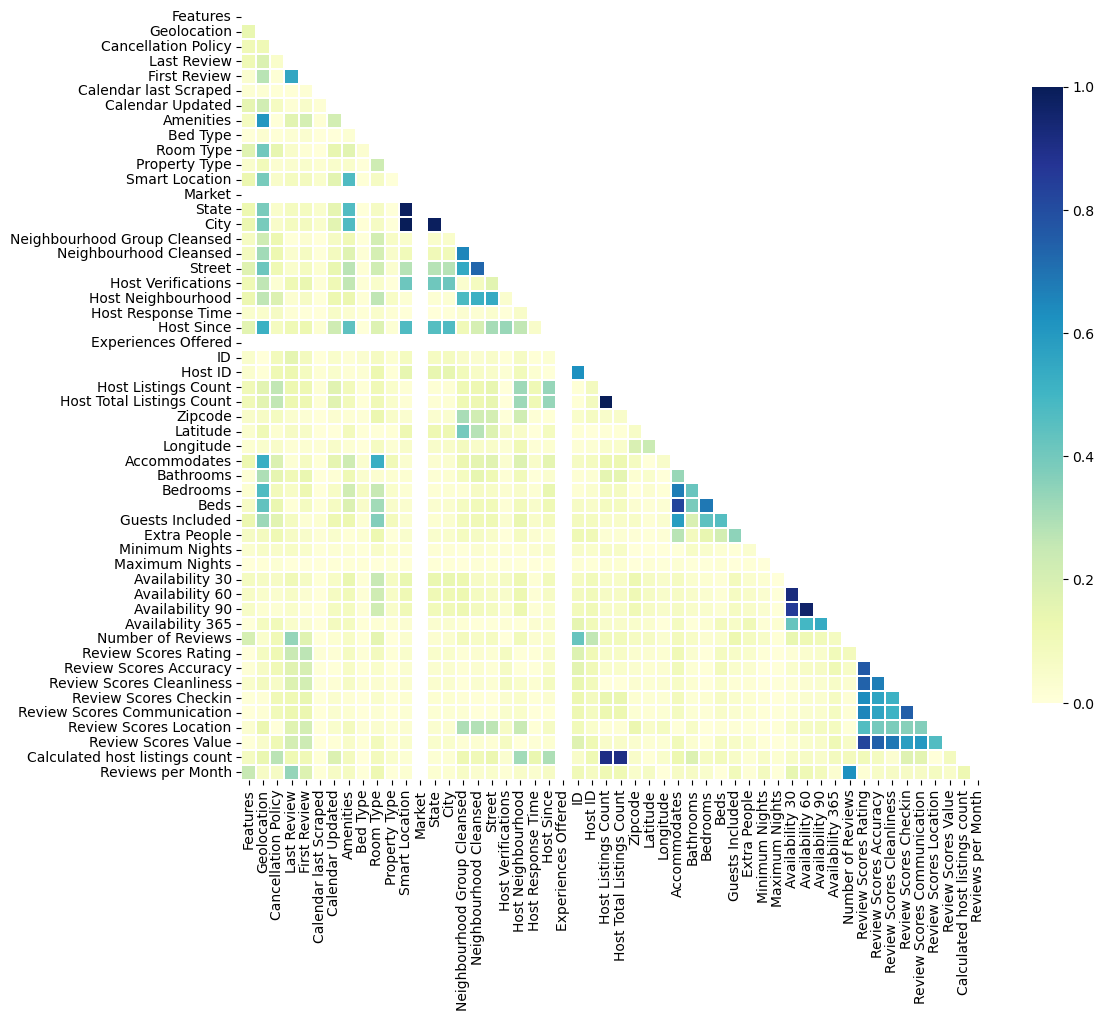

In [2484]:
# Compute the correlation matrix
corr = np.abs(df_new.drop(['Price'], axis=1).corr())
#corr = np.abs(house_data_filtered.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Aún podría eliminar 'Host Listings Count' y 'Host Total Listings Count", que muestran una alta correlación con 'Calculated host listings count'. 

Lo mismo ocurre con 'Availability 60' y 'Availability 90', que tienen una alta correlación con 'Availability 30'. 

'State' y 'City' podrían eliminarse dejando 'Smart Location'

'Accomodates' puede eliminarse dejando 'Beds'

'

Voy a eliminarlos para simplificar un poco más el modelo --> 

In [2485]:
df_new.drop(['Host Listings Count', 
            'Host Total Listings Count',
            'Availability 60', 
            'Availability 90',
            'State', 'City', 'Accommodates'], axis = 1, inplace=True)

Vuelvo a analizar las correlaciones --> 

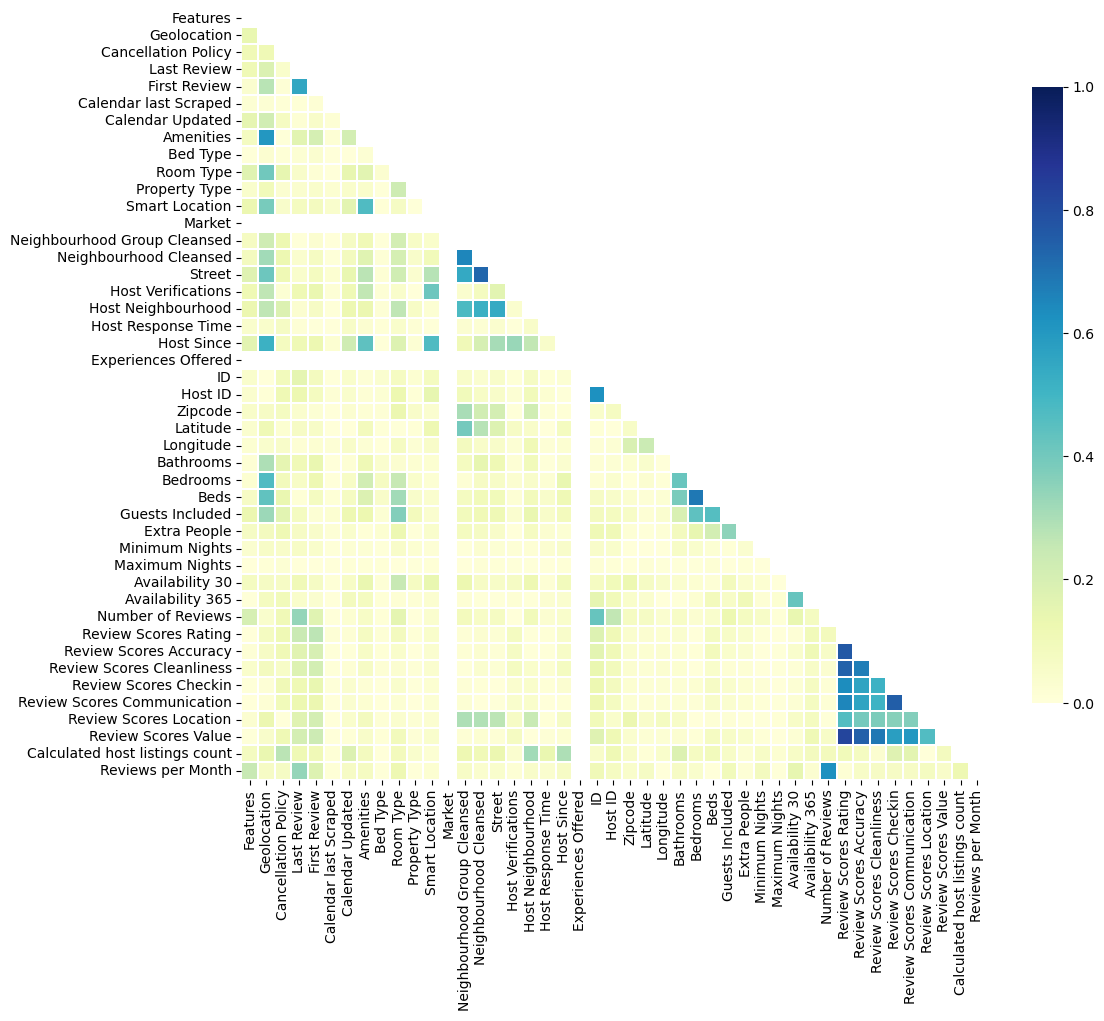

In [2486]:
# Compute the correlation matrix
corr = np.abs(df_new.drop(['Price'], axis=1).corr())
#corr = np.abs(house_data_filtered.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

En principio, las variables se ven poco correlacionadas entre sí, salvo la parte de scores, que muestran una mayor correlación, pero sin llegar a 1. 

Voy a eliminar Review Scores Rating que es la que muestra correlación más alta con los otros scores (Review Scores Value y Review Scores Accuracy) -->

In [2487]:
df_new.drop(['Review Scores Rating'], axis = 1, inplace=True)

Ahora voy a hacer algunos análisis de todas las variables con 'y' ('Price'), para poder detectar correlaciones y posibles outliers -->

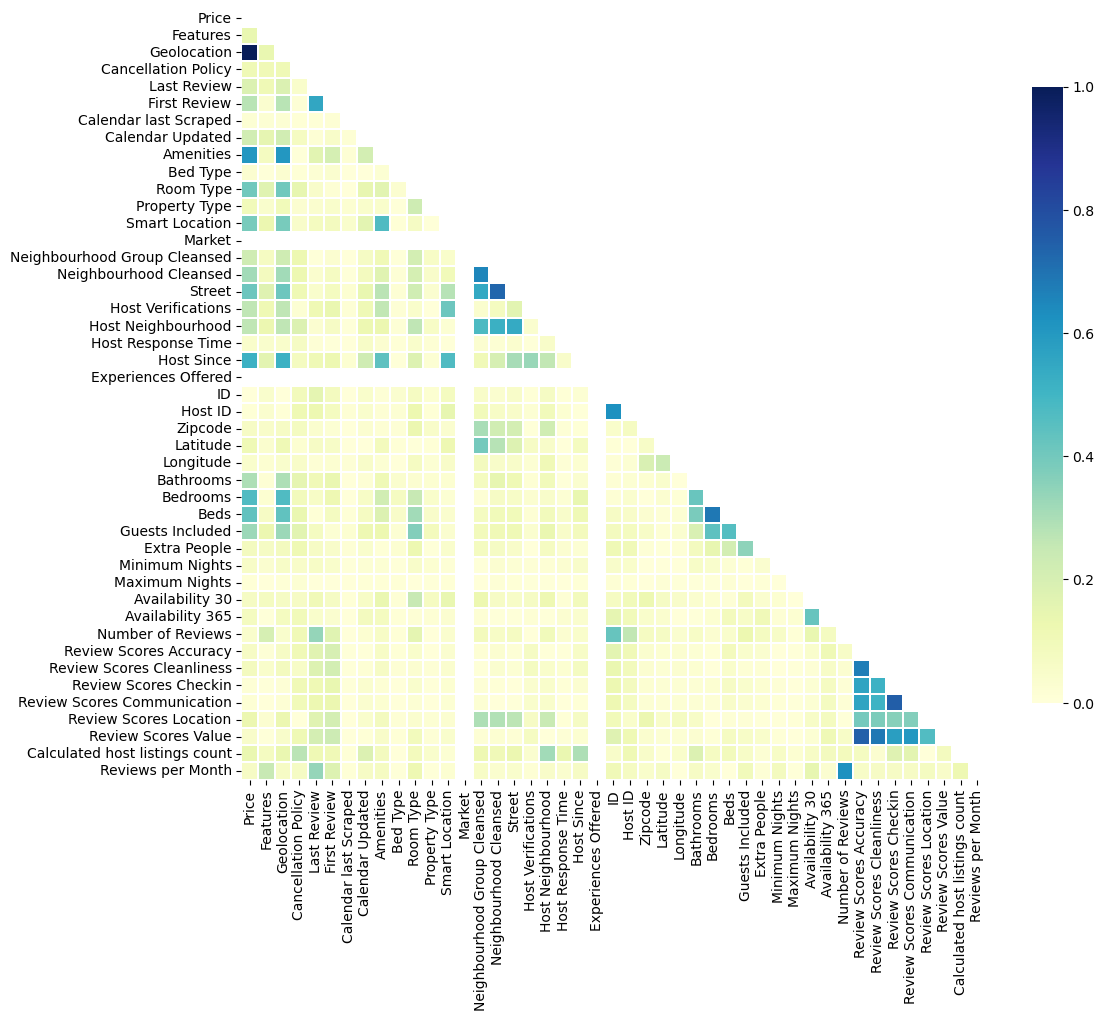

In [2488]:
# Compute the correlation matrix
corr = np.abs(df_new.corr())
#corr = np.abs(house_data_filtered.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [2058]:
len(lista_columnas)

53

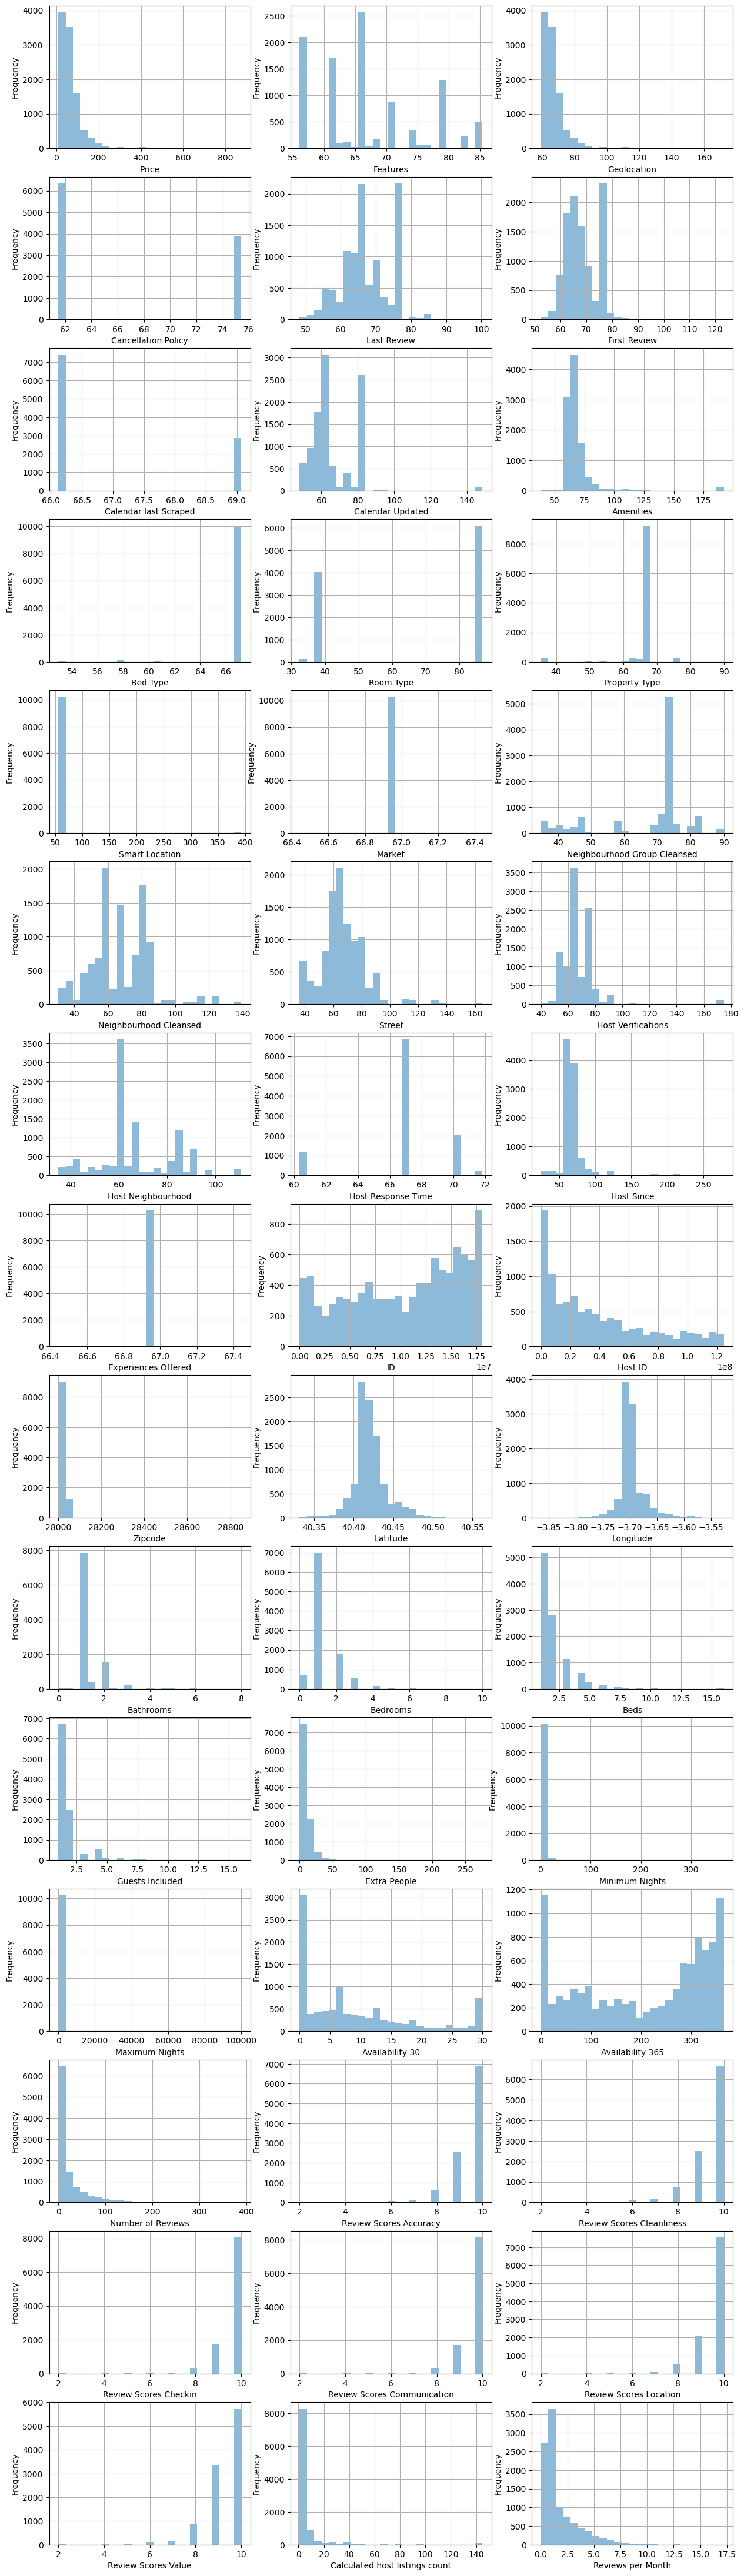

In [2489]:
lista_columnas = list(df_new.columns.values)
plt.figure(figsize=(15, 75))
for i in range(len(lista_columnas)):
    plt.subplot(20, 3, i + 1)
    df_new[lista_columnas[i]].plot.hist(alpha=0.5, bins=25, grid = True)
    plt.xlabel(lista_columnas[i])

En este análisis salieron algunos aprendizajes interesantes: 
- No se visualizan outliers importantes. 
- Voy a revisar 'Experiences Offered' y 'Smart Location'a detalle pues se ven más concentrados
- 'Calendar last Scraped' y 'Market' deberían haber sido borradas antes, pues no aportan información. 
- 'Geolocation' me devuelve los mismos valores promedio que el precio de su fila. Esto significa que todos son diferentes. No aporta para correlacionarse. Voy a eliminarla. 


Text(0.5, 0, 'Experiences Offered')

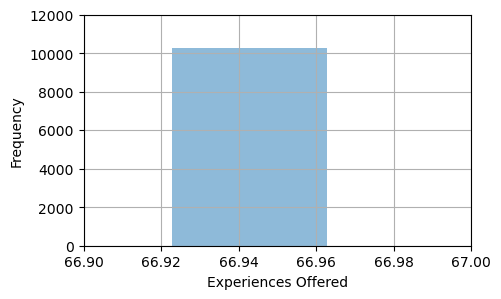

In [2490]:
plt.figure(figsize=(5, 3))
df_new['Experiences Offered'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([66.9, 67, 0, 12000])
plt.xlabel('Experiences Offered')

In [2491]:
df_new['Experiences Offered'].describe()

count    1.025000e+04
mean     6.694273e+01
std      4.178195e-12
min      6.694273e+01
25%      6.694273e+01
50%      6.694273e+01
75%      6.694273e+01
max      6.694273e+01
Name: Experiences Offered, dtype: float64

'Experiences Offered' no aporta información. Se puede eliminar. 

In [2492]:
df_new.drop(['Experiences Offered'], axis = 1, inplace=True)

Text(0.5, 0, 'Smart Location')

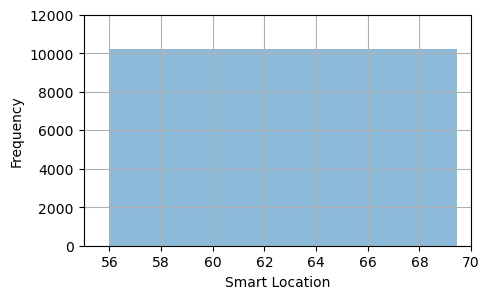

In [2493]:
plt.figure(figsize=(5, 3))
df_new['Smart Location'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([55, 70, 0, 12000])
plt.xlabel('Smart Location')

In [2494]:
df_new['Price'].corr(df_new['Smart Location'])

0.38788346783694977

No alcanzo a visualizar su importancia y muestra una correlación baja, pero no despreciable. Voy a mantenerla.

Bueno, ahora borro 'Calendar Last Scraped', que no es información de la base original y 'Market', pues todas están en el Madrid.

In [2495]:
df_new.drop(['Calendar last Scraped', 'Market', 'Geolocation'], axis = 1, inplace=True)

In [2496]:
len(df_new.columns)

41

He reducido ya el número de variables a 41!

Ahora voy a hacer un Scatter Plot de todas las variables que me quedan vs 'Price' -->

<Figure size 1000x2000 with 0 Axes>

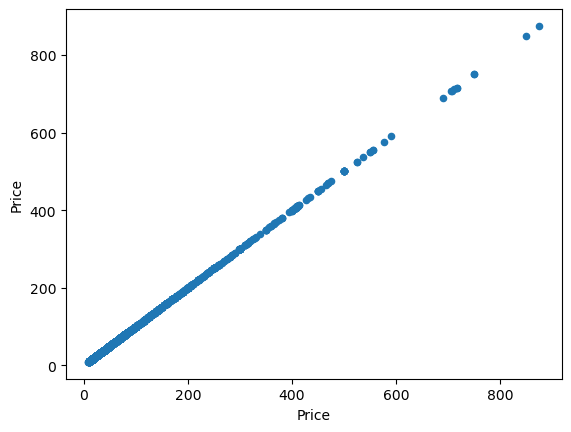

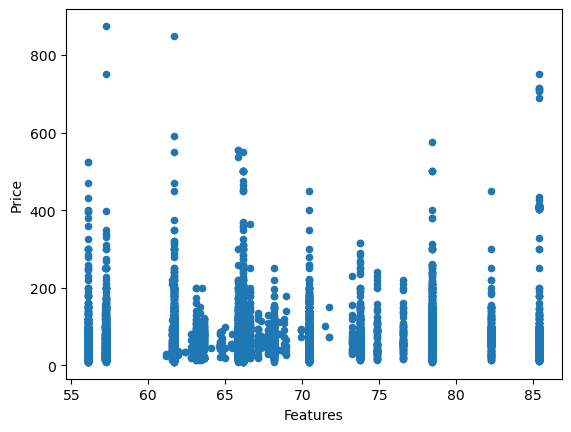

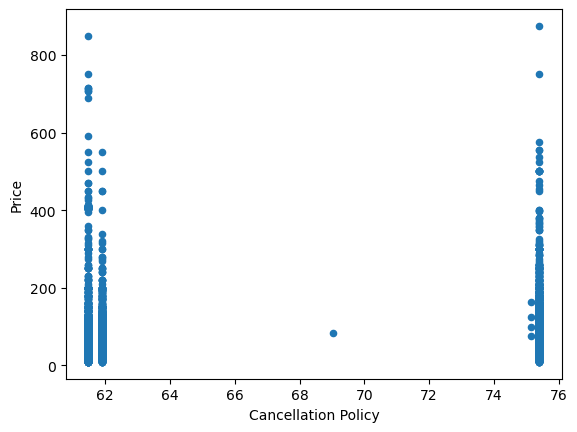

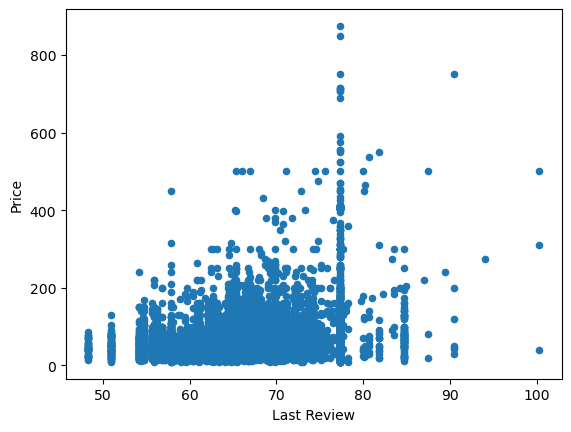

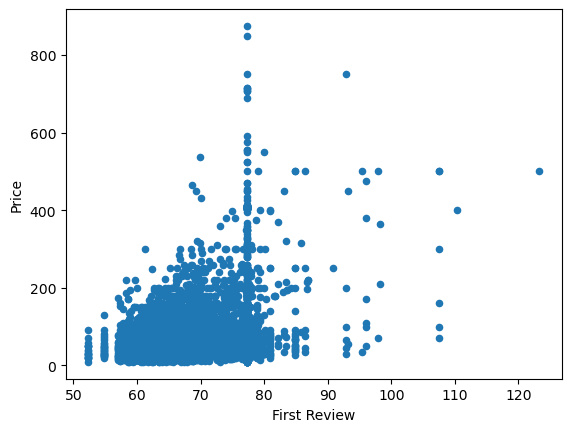

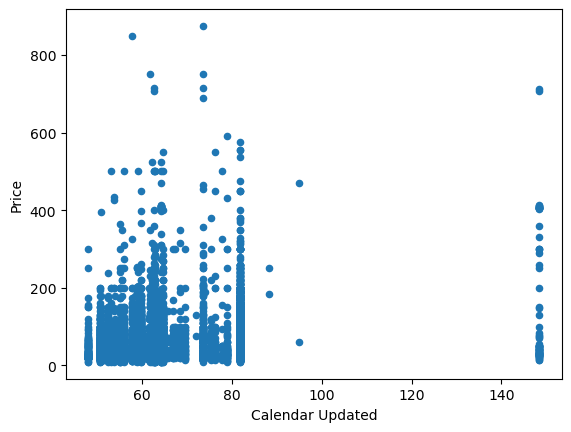

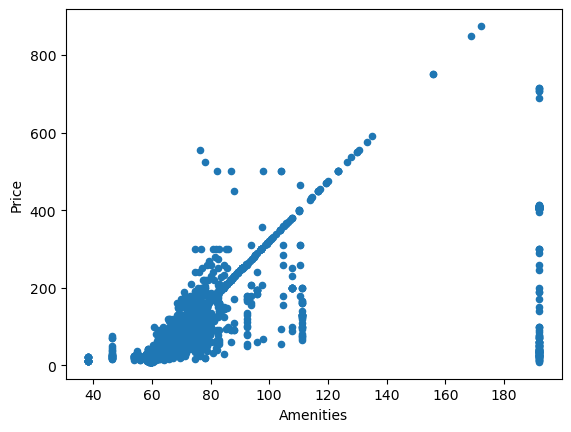

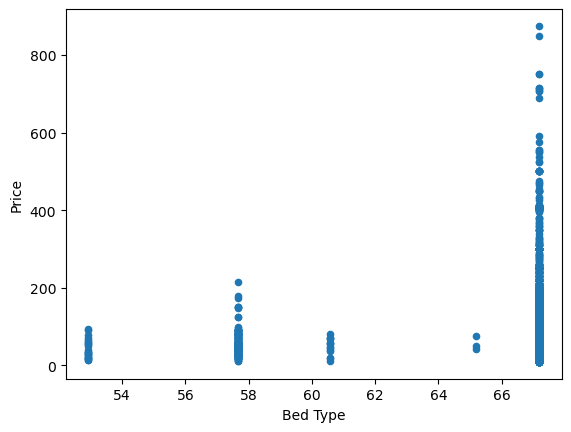

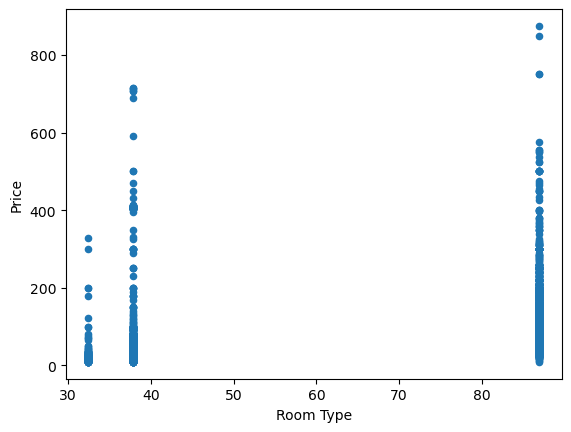

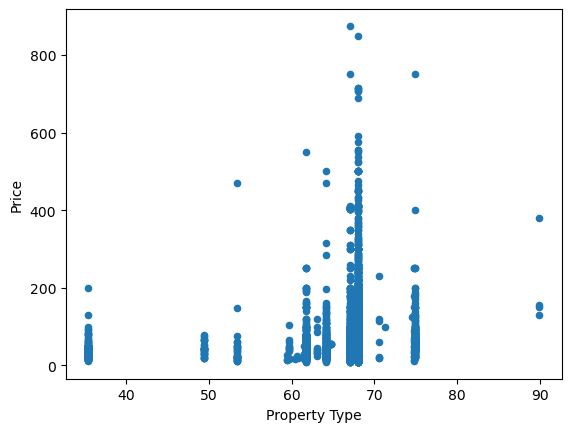

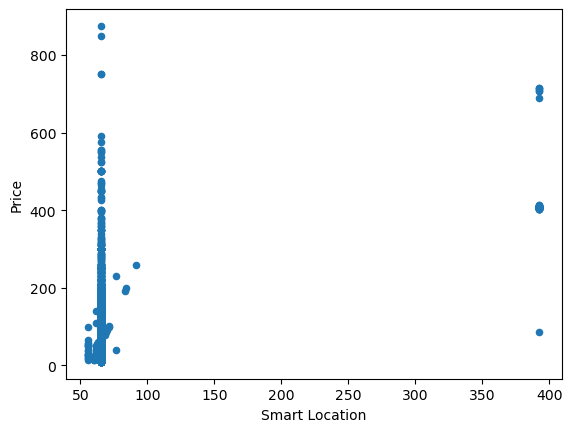

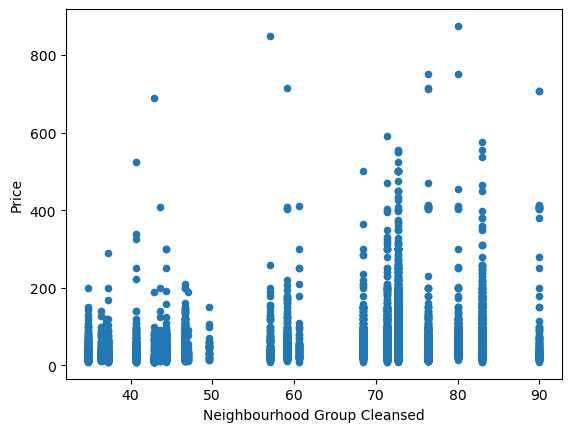

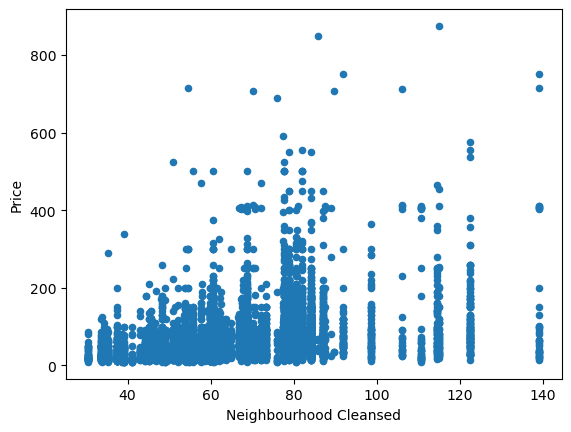

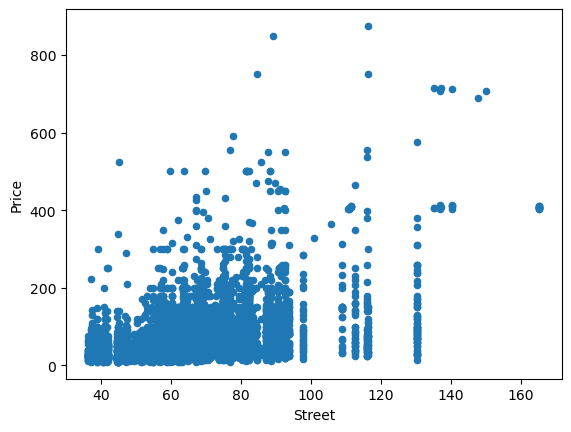

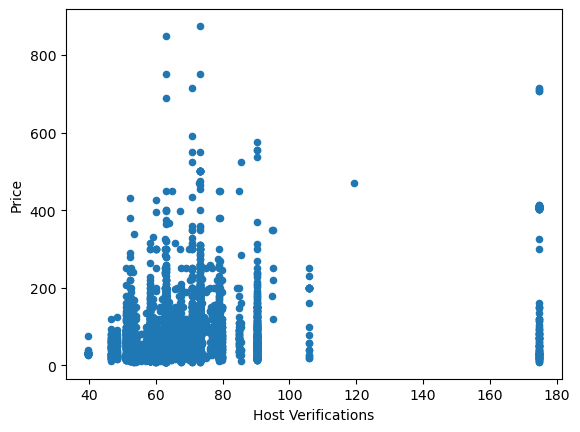

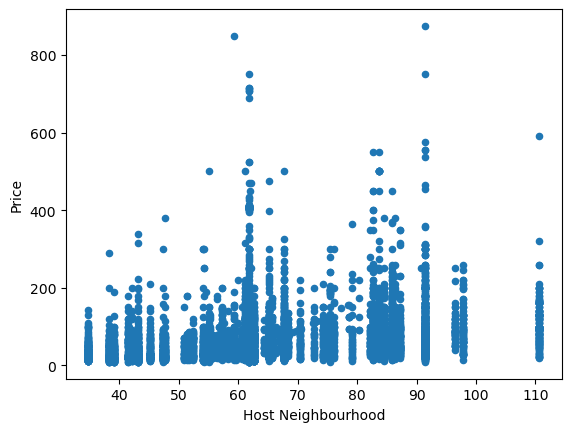

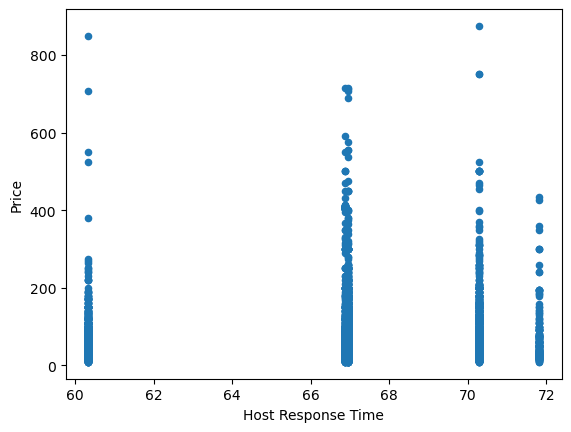

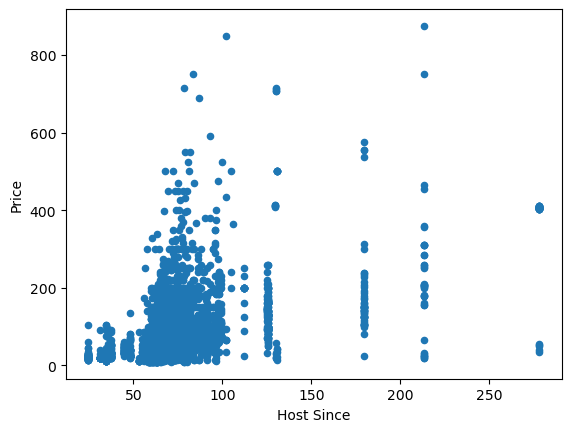

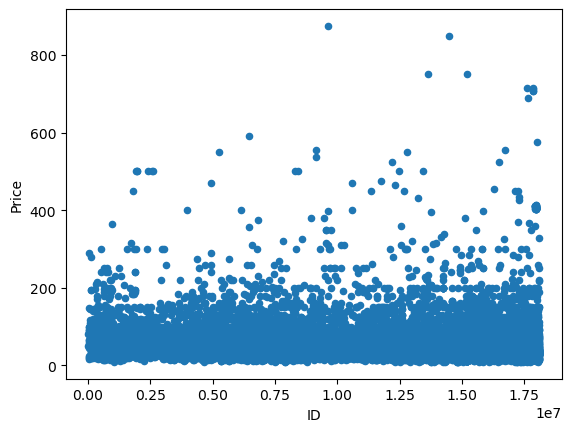

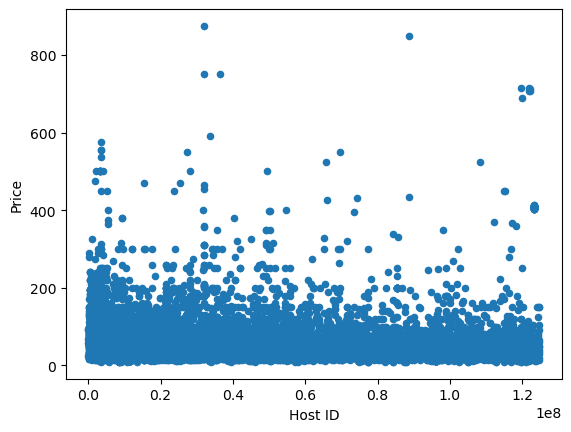

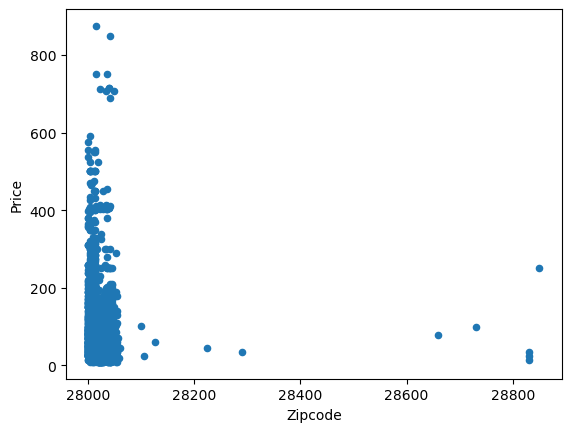

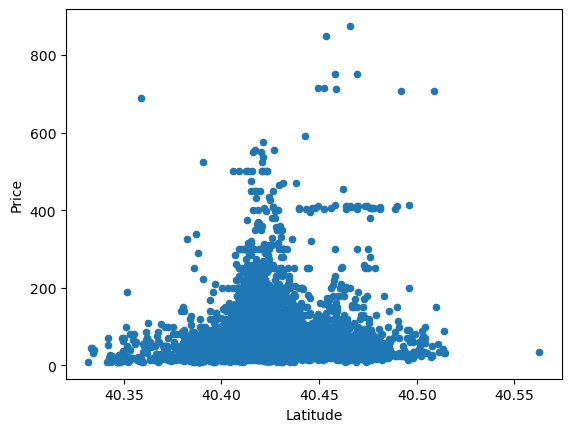

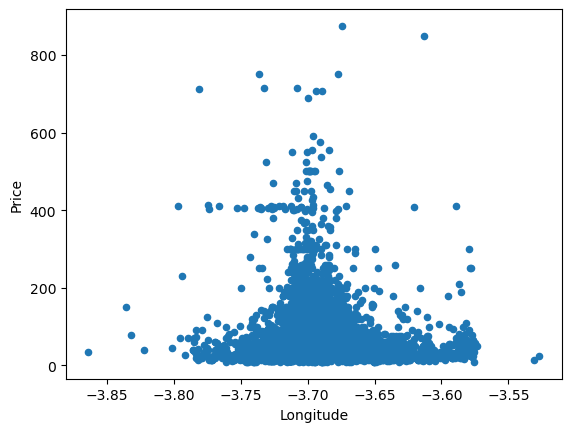

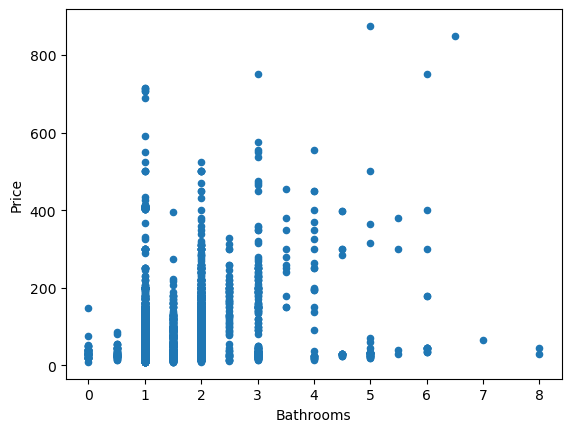

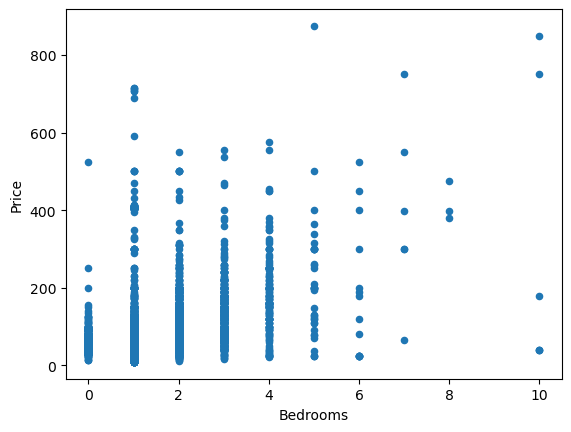

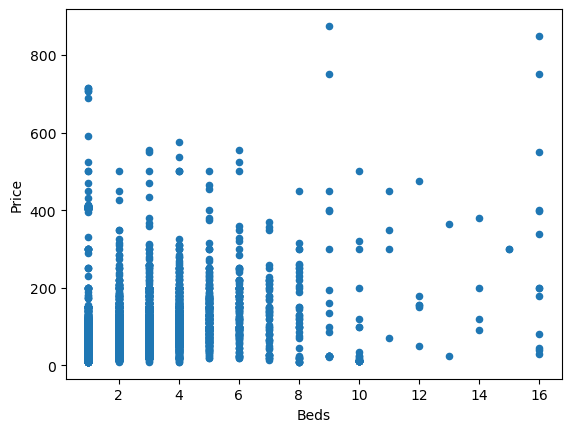

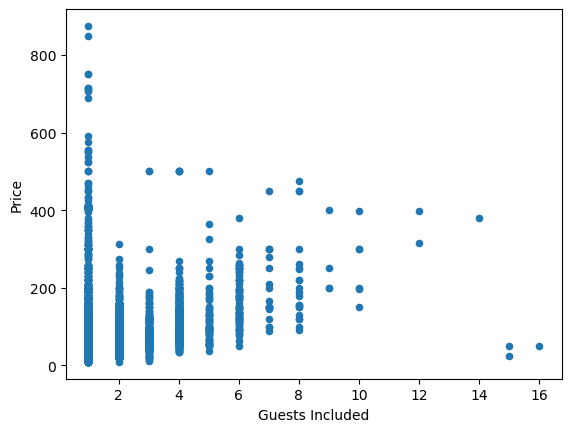

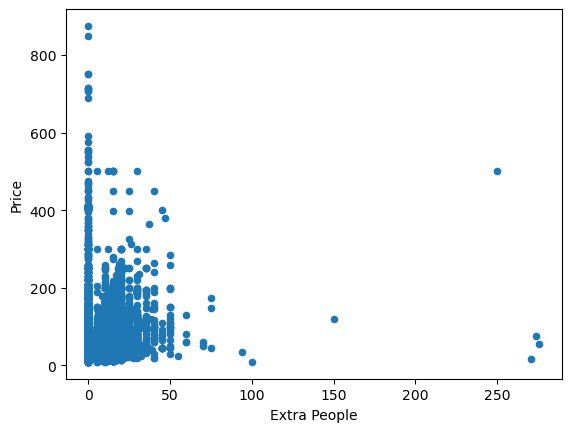

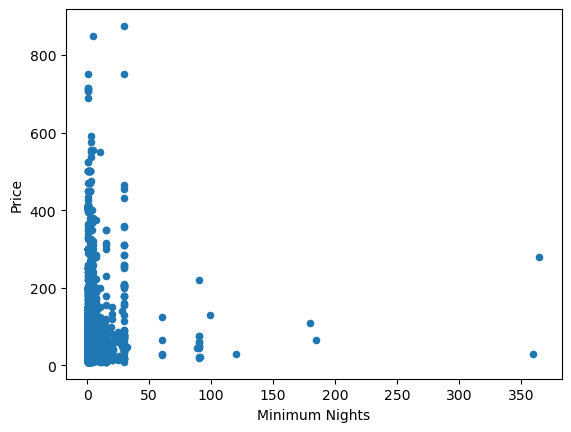

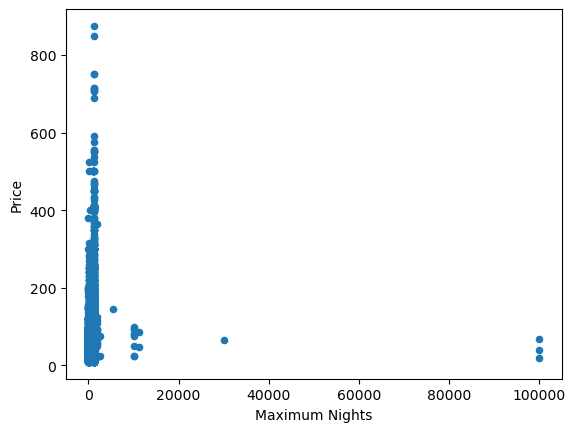

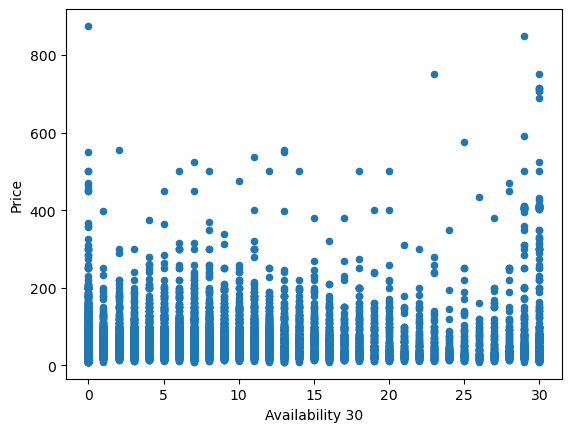

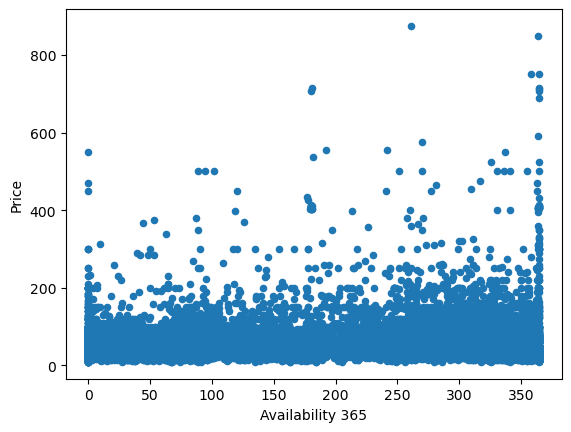

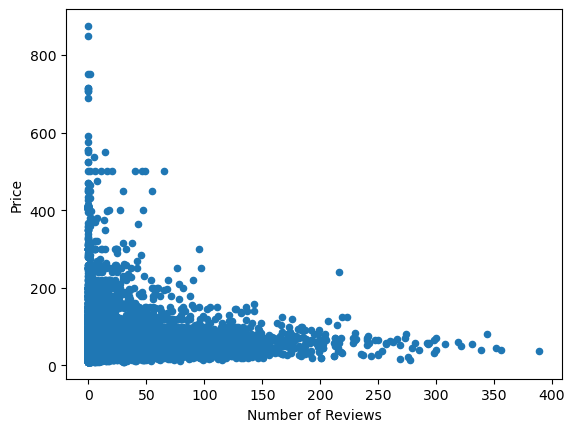

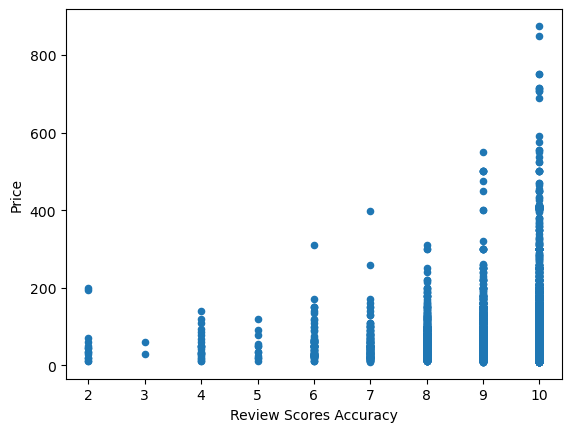

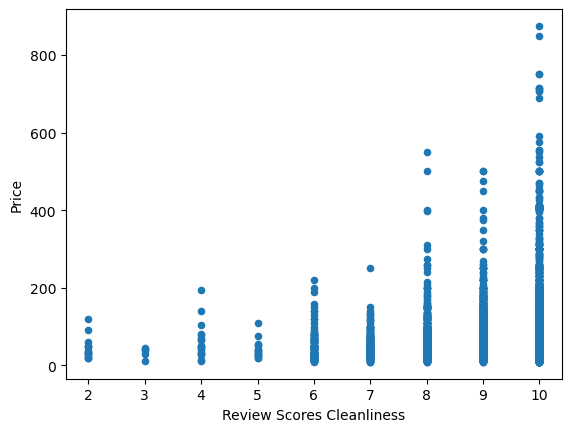

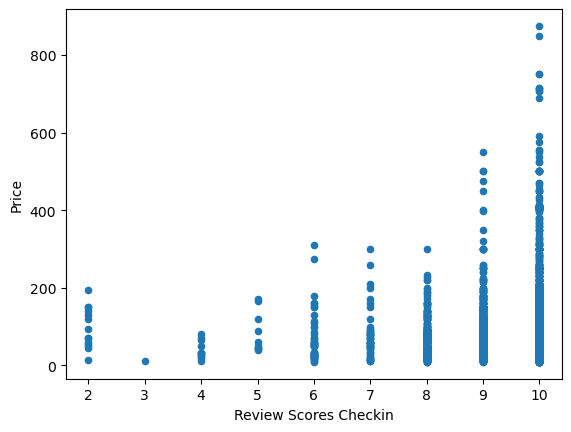

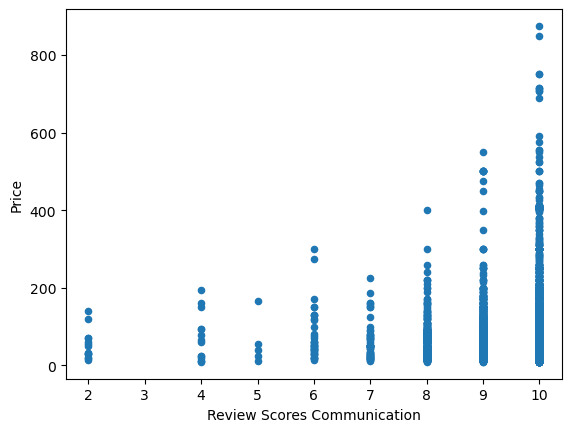

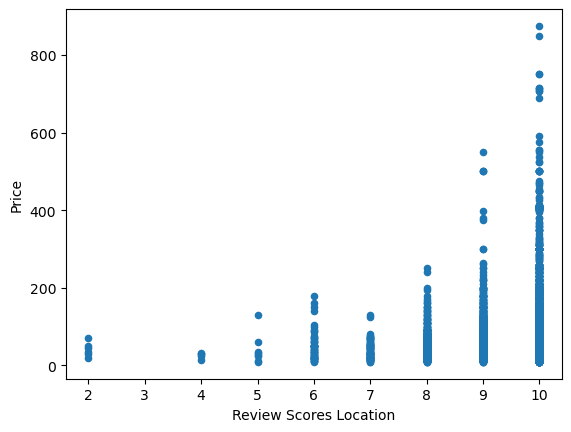

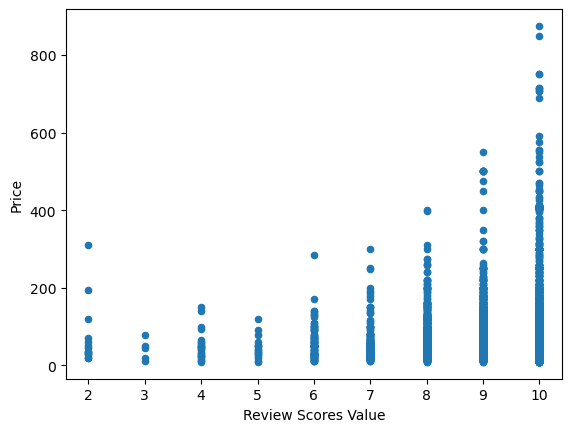

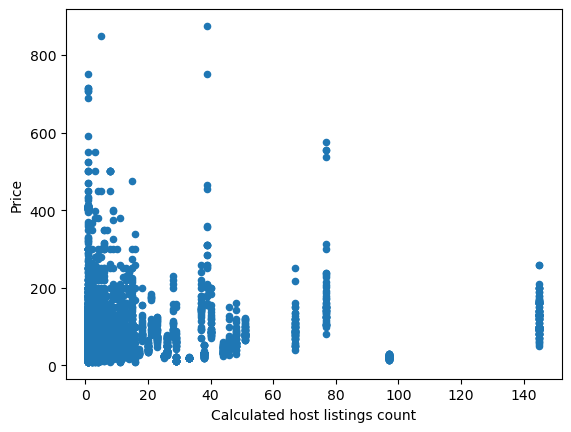

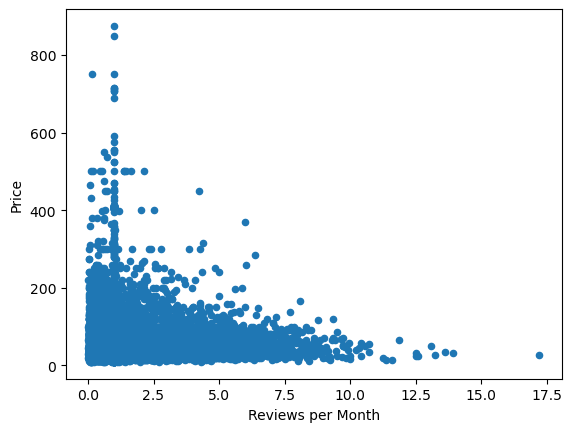

In [2497]:
lista_columnas = list(df_new.columns.values)
plt.figure(figsize=(10, 20))
for i in range(len(lista_columnas)):
    ##plt.subplot(20, 3, i + 1)
    df_new.plot(kind = 'scatter',x=lista_columnas[i],y = 'Price')
    plt.xlabel(lista_columnas[i])
    plt.ylabel('Price')
    plt.show()

'Smart location' muestra algunos datos con niveles de precio promedios muy elevados. Voy a revisarla --> 

In [2498]:
df_new['Smart Location'].value_counts()

65.596649     10145
392.546483       38
56.002739        17
61.519880        11
62.140535         6
62.836802         4
65.388881         3
60.283855         2
62.786712         2
76.596728         2
63.901057         2
61.875952         2
61.355518         1
68.511484         1
91.800901         1
62.656603         1
69.942678         1
62.136169         1
83.213742         1
69.292135         1
61.485627         1
71.503979         1
60.835085         1
60.184542         1
63.437254         1
84.254610         1
68.641593         1
71.243762         1
Name: Smart Location, dtype: int64

In [2499]:
df_new.shape

(10250, 41)

Voy a eliminar 'Smart Location', pues el 99% de su información cae en un solo valor. 
'ID' son datos que son asignados al azar y todos diferentes. 

In [2500]:
df_new.drop(['Smart Location'], axis = 1, inplace=True)

In [2501]:
df_new.drop(['ID'], axis = 1, inplace=True)

Me ha llamado la atención 'Maximum Nights', parece que hay algunos outliers ahí -->

In [2502]:
df_new['Maximum Nights'].value_counts()

1125      7237
30         458
365        352
15         199
7          185
60         160
10         155
90         139
31          83
5           82
20          80
3           75
180         73
14          69
28          66
6           60
4           60
120         41
8           33
1000        32
29          30
730         29
360         28
100         27
330         26
2           25
300         23
21          22
25          21
45          20
40          20
9           16
12          15
50          14
200         13
1           13
16          12
999         12
1825        10
35           9
150          9
32           9
27           8
500          7
18           6
2000         6
11           6
10000        6
17           5
600          5
350          5
70           5
61           4
62           4
800          4
1500         4
23           4
250          4
99           3
9999         3
22           3
210          3
26           3
80           3
1460         3
1200         3
240       

In [2503]:
df_new['Maximum Nights'].describe()

count     10250.000000
mean        876.923610
std        1810.736181
min           1.000000
25%         365.000000
50%        1125.000000
75%        1125.000000
max      100000.000000
Name: Maximum Nights, dtype: float64

No le encuentro ningún sentido a los datos. Voy a limitarlo al 75% de los datos, o sea, 'Maximum Nights' < 1125 -->

In [2504]:
df_new = df_new[df_new['Maximum Nights'] < 1125]

<Figure size 1000x2000 with 0 Axes>

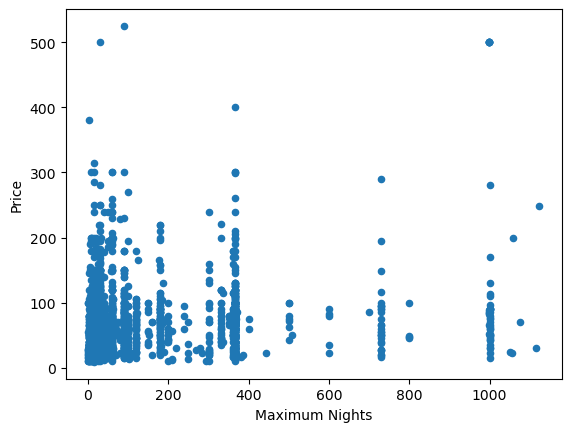

In [2505]:
lista_columnas = list(df_new.columns.values)
plt.figure(figsize=(10, 20))
df_new.plot(kind = 'scatter',x='Maximum Nights',y = 'Price')
plt.xlabel('Maximum Nights')
plt.ylabel('Price')
plt.show()

Lo mismo me pasa con 'Minimum Nights', voy a analizarlo --> 

In [2506]:
df_new['Maximum Nights'].value_counts()

30      458
365     352
15      199
7       185
60      160
10      155
90      139
31       83
5        82
20       80
3        75
180      73
14       69
28       66
6        60
4        60
120      41
8        33
1000     32
29       30
730      29
360      28
100      27
330      26
2        25
300      23
21       22
25       21
45       20
40       20
9        16
12       15
50       14
1        13
200      13
16       12
999      12
150       9
35        9
32        9
27        8
500       7
11        6
18        6
350       5
600       5
17        5
70        5
800       4
61        4
62        4
250       4
23        4
26        3
210       3
80        3
22        3
160       3
240       3
99        3
364       3
65        2
185       2
400       2
19        2
13        2
91        2
93        2
37        2
75        2
366       2
1115      1
38        1
1075      1
108       1
176       1
361       1
295       1
1050      1
41        1
369       1
363       1
1124      1
1059

In [2507]:
df_new['Maximum Nights'].describe()

count    2958.000000
mean      113.330629
std       185.555990
min         1.000000
25%        14.000000
50%        30.000000
75%       100.000000
max      1124.000000
Name: Maximum Nights, dtype: float64

Hay mucha variación, voy a hacer lo mismo que en el anterior y lo voy a limitar al 75% --> 100

In [2508]:
df_new = df_new[df_new['Minimum Nights'] < 100]

<Figure size 1000x2000 with 0 Axes>

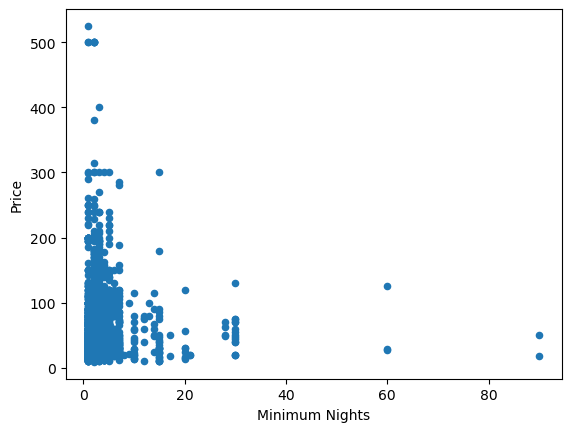

In [2509]:
lista_columnas = list(df_new.columns.values)
plt.figure(figsize=(10, 20))
df_new.plot(kind = 'scatter',x='Minimum Nights',y = 'Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

'Extra People' también parece tener algunos outliers --> 

In [2510]:
df_new['Extra People'].value_counts()

0      1505
10      426
15      301
20      181
5       106
25       72
12       46
8        42
30       42
18       30
11       22
7        20
17       17
35       17
19       17
50       15
9        13
13       12
14       11
40        9
6         8
28        7
16        7
22        7
45        5
23        4
21        3
70        2
75        1
150       1
27        1
29        1
250       1
32        1
271       1
60        1
Name: Extra People, dtype: int64

In [2511]:
df_new['Extra People'].describe()

count    2955.000000
mean        7.601692
std        11.833936
min         0.000000
25%         0.000000
50%         0.000000
75%        15.000000
max       271.000000
Name: Extra People, dtype: float64

No hace sentido tampoco permitir 271 personas más para hospedarse en un airbnb. Voy a limitarlo, igualmente al 75%, que es 15 personas. --> 

In [2512]:
df_new = df_new[df_new['Extra People'] < 15]

<Figure size 1000x2000 with 0 Axes>

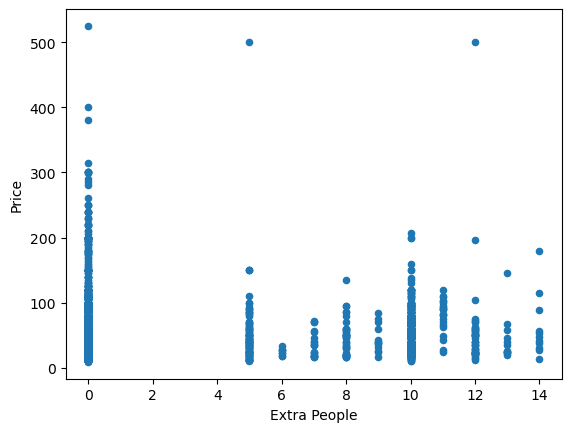

In [2513]:
lista_columnas = list(df_new.columns.values)
plt.figure(figsize=(10, 20))
df_new.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('Extra People')
plt.ylabel('Price')
plt.show()

Valido mi matriz de correlación nuevamente, después de estos cambios, solo por curiosidad --> 

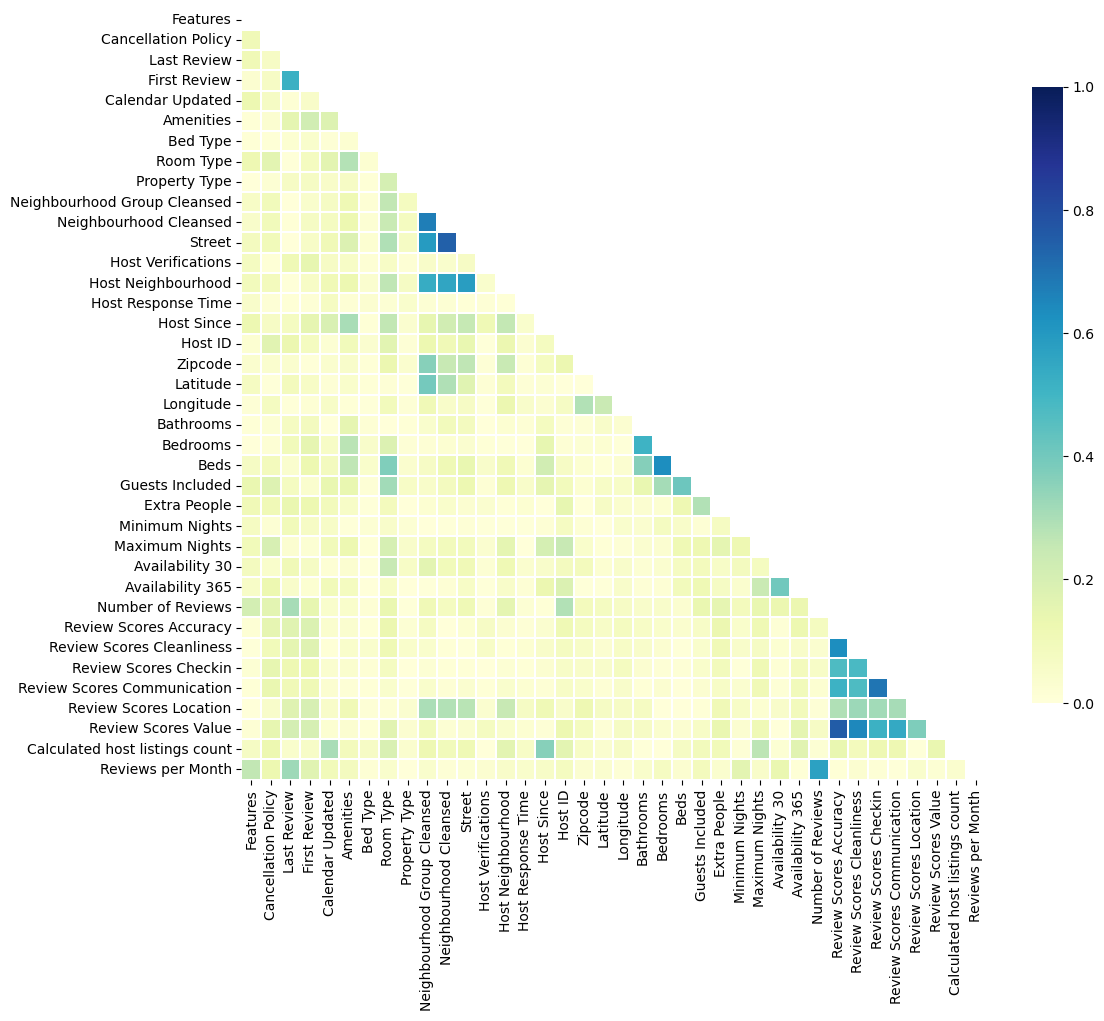

In [2514]:
# Compute the correlation matrix
corr = np.abs(df_new.drop(['Price'], axis=1).corr())
#corr = np.abs(house_data_filtered.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [2515]:
print("Se ha reducido el número de variables a --> ",len(df_new.columns))

Se ha reducido el número de variables a -->  39


In [2516]:
df_new.columns

Index(['Price', 'Features', 'Cancellation Policy', 'Last Review',
       'First Review', 'Calendar Updated', 'Amenities', 'Bed Type',
       'Room Type', 'Property Type', 'Neighbourhood Group Cleansed',
       'Neighbourhood Cleansed', 'Street', 'Host Verifications',
       'Host Neighbourhood', 'Host Response Time', 'Host Since', 'Host ID',
       'Zipcode', 'Latitude', 'Longitude', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 30', 'Availability 365', 'Number of Reviews',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [2517]:
df_regresiones = df_new

### PARA RECUPÉRAR LOS VALORES DE DF_NEW !!!!!

In [2088]:
df_new = df_regresiones

## 5. Regresión Lasso

Ahora, voy a pruebas de filtrado para ver cómo se comportan las variables que han quedado después de normalizar y clasificarlas por su peso en el precio.

Primero divido en y y X -->

In [2089]:
data2 = df_new.values
y_train = data2[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data2[:,1:]      # nos quedamos con el resto
feature_names = df_new.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

Ahora aplico el filtro y las pruebo, quiero detectar las variables que aportan más del 0,4 tanto en varianza como en mi -->

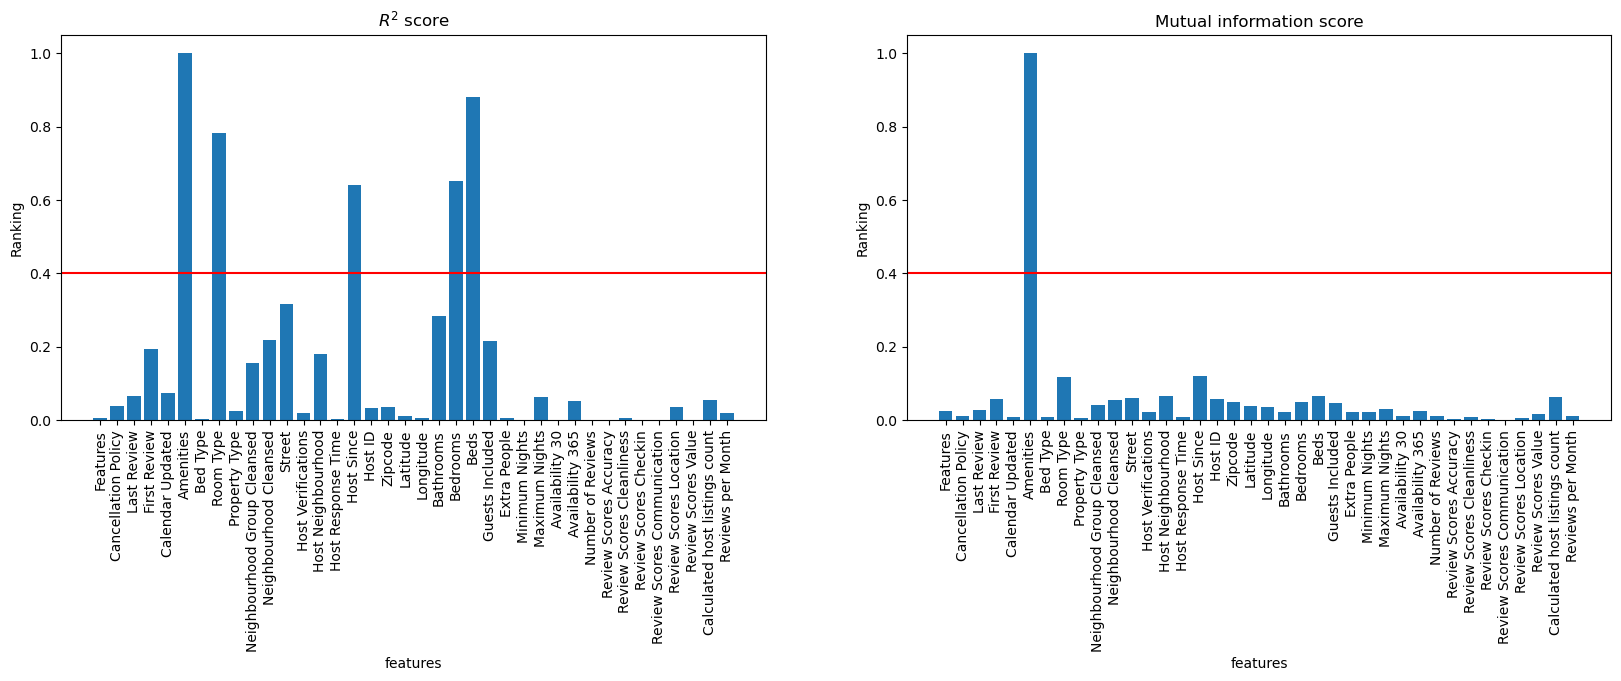

In [2090]:
feature_names = df_new.columns[1:]


# do calculations
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.axhline(y=0.4, color='r', linestyle='-')
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.axhline(y=0.4, color='r', linestyle='-')
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Amenities resalta en todas las pruebas por tener una comportamiento interesante con respecto al precio. Mucho más que otros factores, que hubiera considerado importantes, como las camas, el número de baños, la calle o el Barrio. 

Voy a correr el modelo así para tener un punto de comparación -->

best mean cross-validation score: -702.436
best parameters: {'alpha': 0.28117686979742307}


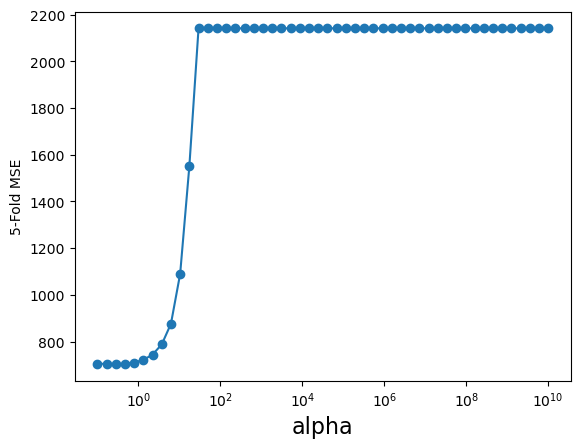

In [2091]:
alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 100)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [2092]:
df_new.describe()

,Price,Features,Cancellation Policy,Last Review,First Review,Calendar Updated,Amenities,Bed Type,Room Type,Property Type,...,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,...,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,58.990954,67.464210,66.385193,67.142178,68.056229,66.167661,66.783204,66.949120,64.928783,66.914090,...,186.266848,26.856174,9.543193,9.477612,9.727273,9.739937,9.644505,9.415197,4.600181,1.848792
std,46.275331,8.167982,6.514516,7.122587,6.438547,10.854658,11.223753,1.547031,24.471573,5.490653,...,129.629546,43.670021,0.753461,0.868671,0.601110,0.603708,0.670848,0.823537,10.477741,1.864943
min,9.000000,56.109603,61.478155,48.320275,52.371366,48.065171,46.471965,52.932803,32.459609,35.469231,...,0.000000,0.000000,4.000000,2.000000,2.000000,2.000000,5.000000,2.000000,1.000000,0.020000
25%,30.000000,61.637629,61.478155,62.705314,63.254767,59.037234,62.094048,67.188958,37.877328,68.058373,...,62.000000,1.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.650000
50%,49.000000,66.139733,61.907864,65.353721,66.591159,62.807372,64.738339,67.188958,86.933147,68.058373,...,192.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000
75%,74.000000,73.754986,75.408440,71.981368,72.567968,81.870534,67.991051,67.188958,86.933147,68.058373,...,311.000000,32.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,2.450000
max,525.000000,85.393145,75.408440,100.316075,107.440424,148.428680,192.060986,67.188958,86.933147,89.923838,...,365.000000,356.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,12.570000


In [2093]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
#ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
#mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
#print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
#print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 651
RMSE Modelo Lasso (train): 25.5
Features -0.567975118827608
Cancellation Policy 2.237628892590899
Last Review 0.8276080258307243
First Review 4.216626018502262
Calendar Updated 0.7850165486832198
Amenities 11.92762674787834
Bed Type 0.2603365246440193
Room Type 12.212542419095334
Property Type 0.0
Neighbourhood Group Cleansed 1.894366599564926
Neighbourhood Cleansed 0.3672896029782629
Street 4.090170342782454
Host Verifications -0.0
Host Neighbourhood 0.64995408651381
Host Response Time 0.0
Host Since 9.486746804521465
Host ID -0.5719079020899831
Zipcode -1.1080055385929732
Latitude -0.0
Longitude -0.0
Bathrooms 5.708573784550734
Bedrooms 6.798328342883435
Beds 7.194498889551135
Guests Included 0.8321497368477042
Extra People -2.904758984784902
Minimum Nights -2.0031468688896092
Maximum Nights 0.0
Availability 30 2.394728442905137
Availability 365 1.8961572831476357
Number of Reviews -0.46602815000645986
Review Scores Accuracy 0.4472018928340626
Review Sco

### IMPORTANTE

Amenities muestra una correlación muy elevada con los resultados de Price. Voy a eliminarla para hacer una prueba y ver si no estoy dejando variables importantes de lado. 

Analizando los datos originales de Amenities, incluye las mismas alternativas, pero puestas en distitno orden. El codificador ha detectado casi todas, como variables diferentes y, por tanto, la alta correlación viene de una mala clasificación de las mismas. 

Creo que es una variable importante, aunque para facilitar mi avance la borraré. 

Esto me dará mayor relevancia para el resto de las variables. 

Con un poco más de tiempo, lo que haría, sería abordarlo como conjuntos, en donde pudiera detectar cuáles tienen qué componentes, independientemente del orden. 


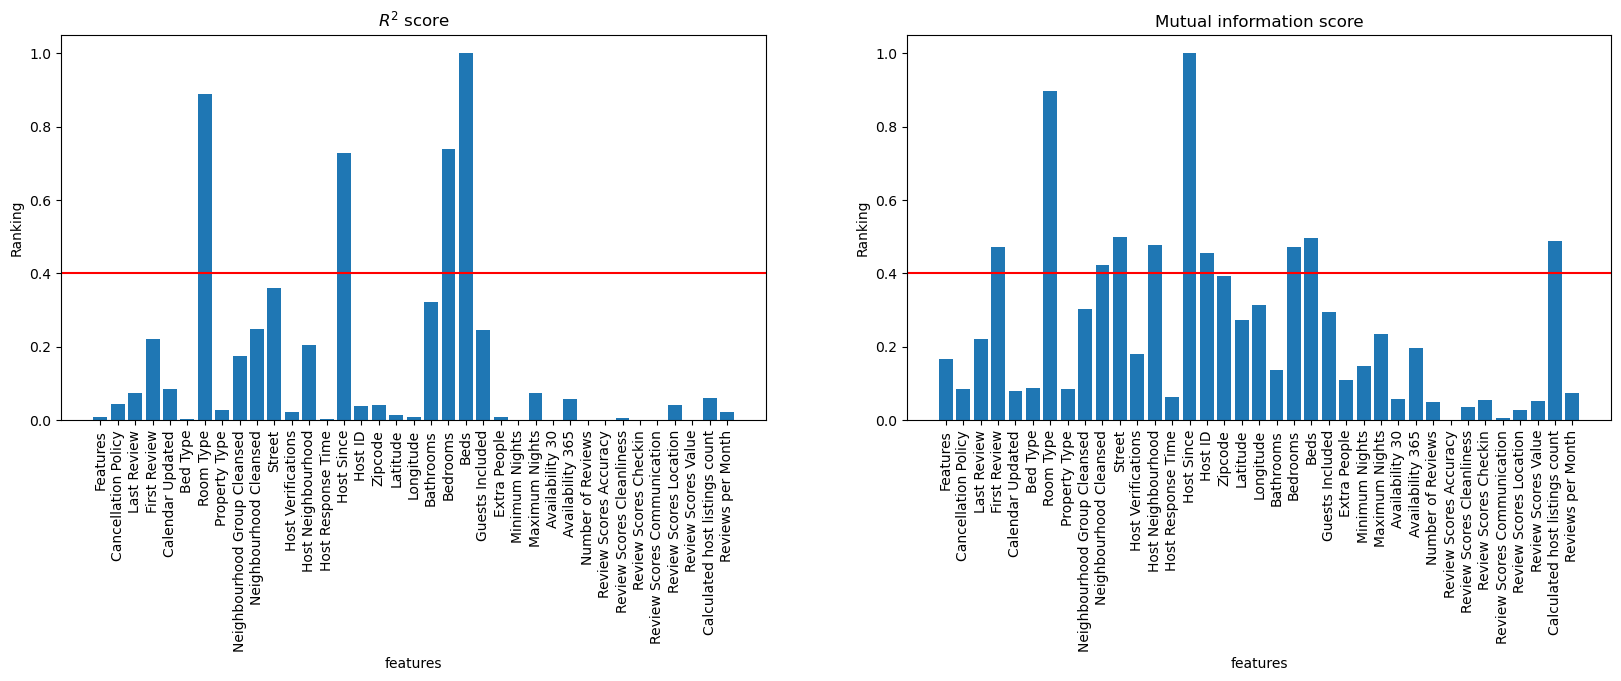

In [2099]:
df_prueba = df_new.drop(['Amenities'], axis=1)
data3 = df_prueba.values
y_train = data3[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data3[:,1:]      # nos quedamos con el resto
feature_names = df_new.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

data3 = df_prueba.values 

feature_names = df_prueba.columns[1:]


# do calculations
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.axhline(y=0.4, color='r', linestyle='-')
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.axhline(y=0.4, color='r', linestyle='-')
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

best mean cross-validation score: -803.890
best parameters: {'alpha': 0.2559547922699533}


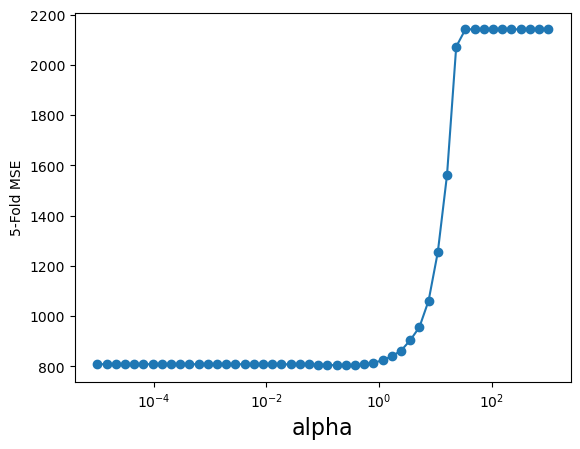

In [2100]:
alpha_vector = np.logspace(-5,3,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 100)
grid.fit(XtrainScaled, y_train1)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [2101]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train1)

ytrainLasso = lasso.predict(XtrainScaled)
#ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train1,ytrainLasso)
#mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
#print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
#print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 756
RMSE Modelo Lasso (train): 27.5
Features -0.8547187385934836
Cancellation Policy 2.09750288877313
Last Review 1.4870955039320934
First Review 5.397459056542647
Calendar Updated 2.209442030675979
Bed Type 0.4159204976640952
Room Type 14.447844582854616
Property Type 0.0
Neighbourhood Group Cleansed 2.247557683101395
Neighbourhood Cleansed 0.0
Street 5.108617996903559
Host Verifications -0.0
Host Neighbourhood 0.2745748715357751
Host Response Time 0.0
Host Since 11.654182831711934
Host ID -1.5903764461093641
Zipcode -1.1063370622210356
Latitude -0.0
Longitude -0.0
Bathrooms 6.032505762089438
Bedrooms 8.614612174182383
Beds 7.555549087893136
Guests Included 0.8258896053565343
Extra People -3.7295812491873193
Minimum Nights -2.495630381910601
Maximum Nights 0.6559913462465471
Availability 30 3.152239948340583
Availability 365 1.9303653225842965
Number of Reviews -1.0588568584659188
Review Scores Accuracy 0.556618593570017
Review Scores Cleanliness 1.8730439266

Existen varios coeficientes = 0:
- Property Type
- Neighbourhood Cleansed
- Host Verifications
- Host Response Time
- Latitude
- Longitude 
- Review Scores Checkin 
- Review Scores Location 
- Review Scorew Value 


Las elimino de los datos -->

In [2103]:
df_prueba = df_prueba.drop(['Review Scores Location', 'Review Scores Value', 'Maximum Nights', 'Longitude', 
                        'Latitude', 'Host Response Time', 'Host Verifications', 'Property Type'], axis = 1)

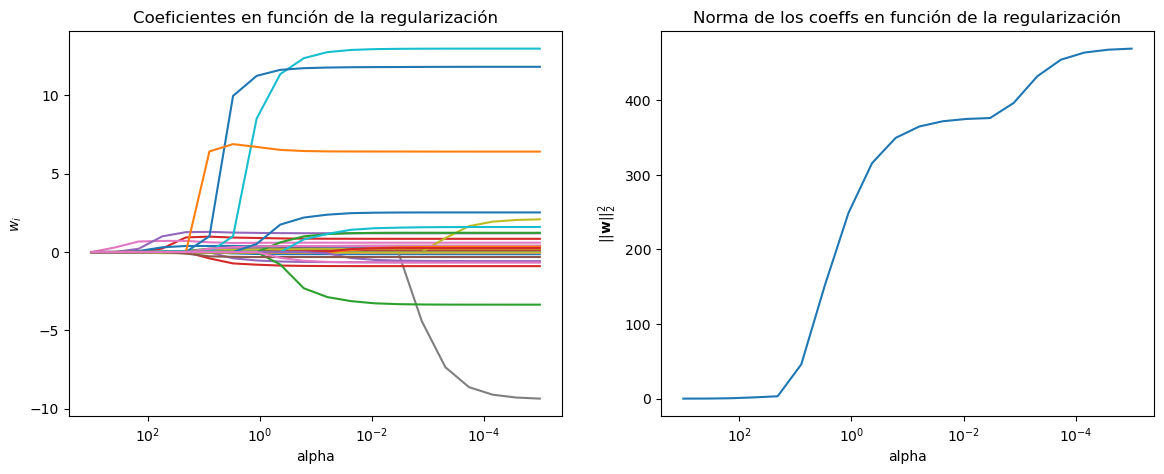

In [2124]:
n_alphas = 20
alphas = np.logspace(-5, 3, n_alphas)
# ...
coefs = []

norm2_coefs = []
for a in alphas:
    #### TU CÓDIGO AQUÍ
    lasso = Lasso(alpha = a).fit(X_train1,y_train1)
    
    #####
    coefs.append(lasso.coef_)
    norm2_coefs.append(np.dot(lasso.coef_,lasso.coef_.T))

# Display results
plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$w_i$')
plt.title('Coeficientes en función de la regularización')
plt.axis('tight')


ax = plt.subplot(1, 2, 2)
ax.plot(alphas, norm2_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$||\mathbf{w}||^2_2$')
plt.title('Norma de los coeffs en función de la regularización')
plt.axis('tight')
plt.show()

El análisis sin Amenities, me da un nivel de error similar, pero me permite ver mejor cómo juegan otras variables. 

De esta manera, me aparecen con coeficientes = 0 las siguientes: Longitude y Neighbourhood Cleansed. Los eliminaré y continuaré el ejercicio. 

## El error se ha incrementado a 27,5€, sin embargo, se ha reducido mucho la complejidad. Las variables con las que continuaremos son:


In [2107]:
print("El número de variables restante es ", len(df_prueba.columns.values))


El número de variables restante es  30


Reduzco el modelo en lasso para quedar únicamente con estas variables --> 


In [2110]:
df_new = df_prueba

Este es el conjunto de variables con el que trabajaré a partir de ahora:

In [2111]:
Recuperar_lasso = df_new
print("Me quedo para continuar con ", len(df_new.columns), "variables.")
print("Las variables son --> ", df_new.columns)
      

Me quedo para continuar con  30 variables.
Las variables son -->  Index(['Price', 'Features', 'Cancellation Policy', 'Last Review',
       'First Review', 'Calendar Updated', 'Bed Type', 'Room Type',
       'Neighbourhood Group Cleansed', 'Neighbourhood Cleansed', 'Street',
       'Host Neighbourhood', 'Host Since', 'Host ID', 'Zipcode', 'Bathrooms',
       'Bedrooms', 'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365', 'Number of Reviews',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')


#### Resetear df_new con valores de Lasso

In [2112]:
df_new = Recuperar_lasso

In [2117]:
df_new.head()

,Price,Features,Cancellation Policy,Last Review,First Review,Calendar Updated,Bed Type,Room Type,Neighbourhood Group Cleansed,Neighbourhood Cleansed,...,Minimum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Calculated host listings count,Reviews per Month
6,35.0,70.440092,61.907864,64.545082,63.220526,81.870534,67.188958,37.877328,72.702152,78.889571,...,2,4,225,49,9.0,9.0,9.0,9.0,8.0,4.38
14,29.0,66.139733,75.408440,75.122473,64.120416,62.807372,67.188958,37.877328,72.702152,84.168493,...,60,7,157,9,10.0,9.0,10.0,10.0,4.0,0.99
15,65.0,67.743257,75.408440,70.771235,66.689966,59.669329,67.188958,86.933147,72.702152,60.519696,...,3,11,321,139,10.0,10.0,10.0,10.0,1.0,2.45
21,56.0,65.440517,61.478155,60.995501,65.518990,59.037234,67.188958,86.933147,72.702152,60.519696,...,3,0,280,25,10.0,9.0,10.0,10.0,1.0,0.40
25,59.0,57.223823,61.907864,61.057778,65.909315,50.706030,67.188958,86.933147,72.702152,68.673372,...,3,0,0,7,10.0,10.0,10.0,10.0,2.0,0.32


In [2113]:
print("Las variables que parecen tener más influencia en los resultados (más de 0,4 en varianza y en mi) son -->")
s = pd.Series((f_test>0.4)+(mi>0.4), name='bools')
features_result = feature_names[s.values]
print(features_result)

Las variables que parecen tener más influencia en los resultados (más de 0,4 en varianza y en mi) son -->
Index(['First Review', 'Room Type', 'Neighbourhood Cleansed', 'Street',
       'Host Neighbourhood', 'Host Since', 'Host ID', 'Bedrooms', 'Beds',
       'Calculated host listings count'],
      dtype='object')


In [2114]:
list(features_result)

['First Review',
 'Room Type',
 'Neighbourhood Cleansed',
 'Street',
 'Host Neighbourhood',
 'Host Since',
 'Host ID',
 'Bedrooms',
 'Beds',
 'Calculated host listings count']

Voy a correr Lasso una vez más, para ver cómo se comporta si mantengo únicamente estas variables -->

In [2122]:
df_prueba = df_new[features_result.insert(0, 'Price')]
df_prueba.head()

,Price,First Review,Room Type,Neighbourhood Cleansed,Street,Host Neighbourhood,Host Since,Host ID,Bedrooms,Beds,Calculated host listings count
6,35.0,63.220526,37.877328,78.889571,92.564968,65.184994,60.118282,64887162,1.0,1.0,8.0
14,29.0,64.120416,37.877328,84.168493,82.260163,83.747178,63.700898,45745512,1.0,1.0,4.0
15,65.0,66.689966,86.933147,60.519696,61.245606,61.183024,77.029876,2659765,1.0,2.0,1.0
21,56.0,65.518990,86.933147,60.519696,61.245606,61.183024,65.518990,1367452,1.0,2.0,1.0
25,59.0,65.909315,86.933147,68.673372,67.178117,61.911801,66.735232,3960473,2.0,2.0,2.0


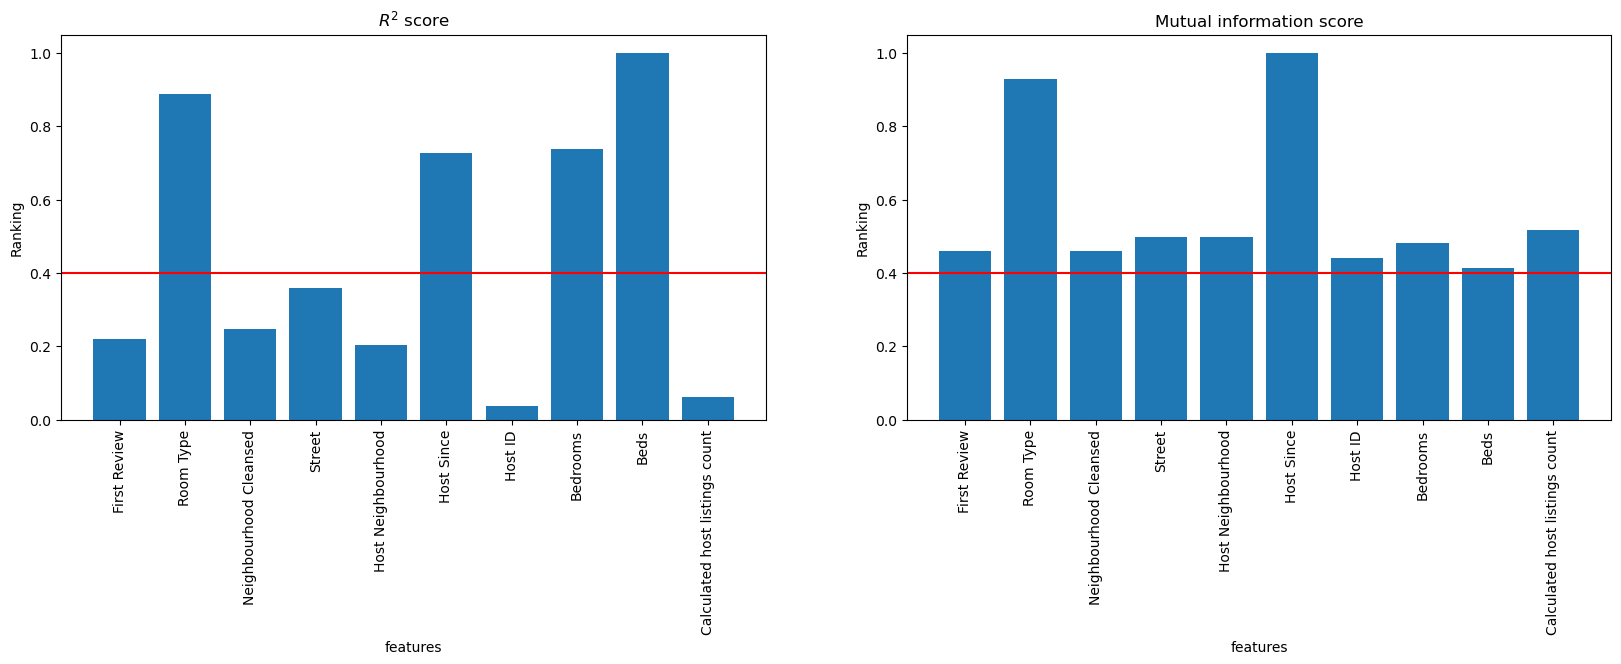

In [2125]:
data3 = df_prueba.values
y_train = data3[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data3[:,1:]      # nos quedamos con el resto
feature_names = df_new.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

data3 = df_prueba.values 

feature_names = df_prueba.columns[1:]


# do calculations
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.axhline(y=0.4, color='r', linestyle='-')
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.axhline(y=0.4, color='r', linestyle='-')
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

best mean cross-validation score: -885.883
best parameters: {'alpha': 1.4563484775012445e-05}


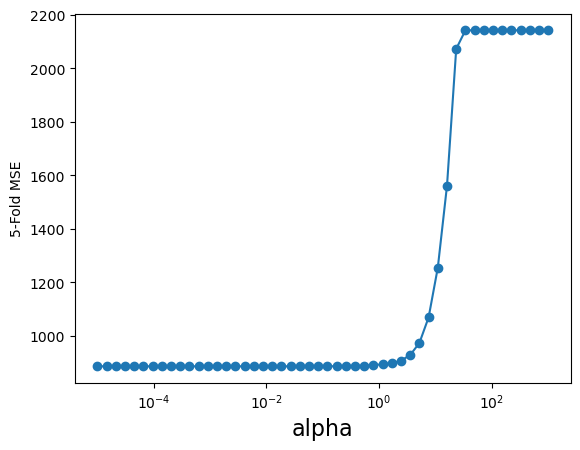

In [2126]:
alpha_vector = np.logspace(-5,3,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 100)
grid.fit(XtrainScaled, y_train1)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [2127]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train1)

ytrainLasso = lasso.predict(XtrainScaled)
#ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train1,ytrainLasso)
#mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
#print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
#print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 857
RMSE Modelo Lasso (train): 29.3
First Review 7.402510503263404
Room Type 12.701181843647122
Neighbourhood Cleansed 1.35636271979252
Street 6.3946056130456315
Host Neighbourhood 0.6573730402170216
Host Since 12.931730123788041
Host ID -1.6433518089280754
Bedrooms 11.739156542834834
Beds 8.05676011132478
Calculated host listings count -2.1178321993678657


## 6. Regresión Lineal 

Ahora voy a intentar obtener el modelo en base a una regresión lineal. 

Voy a iniciar con las 31 variables (incluyendo 'Price') que tenía al final de Lasso --> 

In [2156]:
df_prueba = df_new
linear_vars = df_prueba.columns
data_linear = df_prueba.values

In [2157]:
y_train_linear = data_linear[:,0:1]     # nos quedamos con la 1ª columna, price
X_train_linear = data_linear[:,1:]      # nos quedamos con el resto
feature_names_linear = linear_vars[1:]


In [2158]:
feature_names_linear

Index(['Features', 'Cancellation Policy', 'Last Review', 'First Review',
       'Calendar Updated', 'Bed Type', 'Room Type',
       'Neighbourhood Group Cleansed', 'Neighbourhood Cleansed', 'Street',
       'Host Neighbourhood', 'Host Since', 'Host ID', 'Zipcode', 'Bathrooms',
       'Bedrooms', 'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365', 'Number of Reviews',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [2159]:
print("Estoy utilizando las siguientes variables --> ", feature_names_linear.values, "\n")

poly = PolynomialFeatures(X_train_linear.shape[1])
X = poly.fit_transform(X_train_linear.reshape(-1, 1))
lr = LinearRegression().fit(X_train_linear,y_train_linear)

y_hat = lr.predict(X_train_linear)

error_train = np.mean(np.power(y_train_linear-y_hat,2))

for number in range(len(feature_names_linear)):
    print(feature_names_linear[number], lr.coef_[0,number])

print("El MSE es -->", error_train)
print("El error esperado es de ", np.sqrt(error_train))

Estoy utilizando las siguientes variables -->  ['Features' 'Cancellation Policy' 'Last Review' 'First Review'
 'Calendar Updated' 'Bed Type' 'Room Type' 'Neighbourhood Group Cleansed'
 'Neighbourhood Cleansed' 'Street' 'Host Neighbourhood' 'Host Since'
 'Host ID' 'Zipcode' 'Bathrooms' 'Bedrooms' 'Beds' 'Guests Included'
 'Extra People' 'Minimum Nights' 'Availability 30' 'Availability 365'
 'Number of Reviews' 'Review Scores Accuracy' 'Review Scores Cleanliness'
 'Review Scores Checkin' 'Review Scores Communication'
 'Calculated host listings count' 'Reviews per Month'] 

Features -0.13285730463314313
Cancellation Policy 0.3765987581766012
Last Review 0.21929434244764925
First Review 0.8491869460553917
Calendar Updated 0.23208789962536974
Bed Type 0.4206117994806101
Room Type 0.6030608691555517
Neighbourhood Group Cleansed 0.18482429038683892
Neighbourhood Cleansed -0.03367527191196307
Street 0.3599540604026326
Host Neighbourhood 0.032232984397625355
Host Since 1.206233161890932
Host ID

Parece bueno, pero me parece que se puede mejorar. Voy a eliminar las variables con coeficientes menores a 0.1. Voy a trabajar con las que me resten, a ver qué resultado me da. 

Ahora, voy a reducir el número de variables para quedarme con las que tienen coeficientes iguales o superiores a 0.1 -->

In [2169]:
coeficiente_condicion = pd.Series(lr.coef_[0,] >= 0.1)
coeficientes_valiosos = feature_names_linear[coeficiente_condicion].values
list(coeficientes_valiosos)

['Cancellation Policy',
 'Last Review',
 'First Review',
 'Calendar Updated',
 'Bed Type',
 'Room Type',
 'Neighbourhood Group Cleansed',
 'Street',
 'Host Since',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Guests Included',
 'Availability 30',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin']

In [2170]:
df_prueba = df_new[features_result.insert(0, 'Price')]
df_prueba.head()

,Price,First Review,Room Type,Neighbourhood Cleansed,Street,Host Neighbourhood,Host Since,Host ID,Bedrooms,Beds,Calculated host listings count
6,35.0,63.220526,37.877328,78.889571,92.564968,65.184994,60.118282,64887162,1.0,1.0,8.0
14,29.0,64.120416,37.877328,84.168493,82.260163,83.747178,63.700898,45745512,1.0,1.0,4.0
15,65.0,66.689966,86.933147,60.519696,61.245606,61.183024,77.029876,2659765,1.0,2.0,1.0
21,56.0,65.518990,86.933147,60.519696,61.245606,61.183024,65.518990,1367452,1.0,2.0,1.0
25,59.0,65.909315,86.933147,68.673372,67.178117,61.911801,66.735232,3960473,2.0,2.0,2.0


In [2171]:
linear_vars = df_prueba.columns
data_linear = df_prueba.values

In [2172]:
y_train_linear = data_linear[:,0:1]     # nos quedamos con la 1ª columna, price
X_train_linear = data_linear[:,1:]      # nos quedamos con el resto
feature_names_linear = linear_vars[1:]


In [2173]:
print("Estoy utilizando las siguientes variables --> ", features_result.values, "\n")

poly = PolynomialFeatures(X_train_linear.shape[1])
X = poly.fit_transform(X_train_linear.reshape(-1, 1))
lr = LinearRegression().fit(X_train_linear,y_train_linear)

y_hat = lr.predict(X_train_linear)

error_train = np.mean(np.power(y_train_linear-y_hat,2))

for number in range(len(features_result)):
    print(features_result[number], lr.coef_[0,number])

print("El MSE es -->", error_train)
print("El error esperado es de ", np.sqrt(error_train))

Estoy utilizando las siguientes variables -->  ['First Review' 'Room Type' 'Neighbourhood Cleansed' 'Street'
 'Host Neighbourhood' 'Host Since' 'Host ID' 'Bedrooms' 'Beds'
 'Calculated host listings count'] 

First Review 1.1499795272498285
Room Type 0.5191355190463188
Neighbourhood Cleansed 0.08160232386175507
Street 0.4372637644240455
Host Neighbourhood 0.042526457617751715
Host Since 1.3122979618007342
Host ID -4.491413352347706e-08
Bedrooms 16.051390857880566
Beds 6.819345991175565
Calculated host listings count -0.2021750287525426
El MSE es --> 857.4703730340933
El error esperado es de  29.282595052933633


#### Vale la pena seguir explorando, con 10 variables, solo he incrementado el error a 29,3€. Valdría la penas generar un bucle. 

### 7. Clasificar usando Random Forest

Parto, nuevamente de la base de datos que dejé después de lasso con 10 variables (incluendo 'Price'). 

Voy a clasificar primero las variables, para comprender cómo afectan a los precios en base a sus características --> 

In [2188]:
df_prueba = df_new[features_result.insert(0, 'Price')]
df_prueba.head()

,Price,First Review,Room Type,Neighbourhood Cleansed,Street,Host Neighbourhood,Host Since,Host ID,Bedrooms,Beds,Calculated host listings count
6,35.0,63.220526,37.877328,78.889571,92.564968,65.184994,60.118282,64887162,1.0,1.0,8.0
14,29.0,64.120416,37.877328,84.168493,82.260163,83.747178,63.700898,45745512,1.0,1.0,4.0
15,65.0,66.689966,86.933147,60.519696,61.245606,61.183024,77.029876,2659765,1.0,2.0,1.0
21,56.0,65.518990,86.933147,60.519696,61.245606,61.183024,65.518990,1367452,1.0,2.0,1.0
25,59.0,65.909315,86.933147,68.673372,67.178117,61.911801,66.735232,3960473,2.0,2.0,2.0


In [2204]:
RF_vars = df_prueba.columns
RF_vars.shape
data_RF = df_prueba.values

In [2205]:
y_train_RF = data_RF[:,0:1]     # nos quedamos con la 1ª columna, price
X_train_RF = data_RF[:,1:]      # nos quedamos con el resto
feature_names_RF = RF_vars[1:]

In [2206]:
N,Nfeatures = X_train.shape

rf = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt')
kf  = KFold(n_splits=10, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(X_train_RF):
        
        Xt = X_train_RF[idxTrain,:]
        yt = y_train_RF[idxTrain]
        Xv = X_train_RF[idxVal,:]
        yv = y_train_RF[idxVal]
        
        rf.fit(Xt,yt)
        
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt[:,selected]
        
        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

# features 1 error 0.9235599853246912 +/- 0.01335883216561799
# features 2 error 0.8991398638457462 +/- 0.010723914888745483
# features 3 error 0.8991235579470873 +/- 0.022220393375058472
# features 4 error 0.8955179161061514 +/- 0.017716844878670895
# features 5 error 0.8959663283192695 +/- 0.0143583207529536
# features 6 error 0.9059108882638295 +/- 0.020460357519669552
# features 7 error 0.8995780848722026 +/- 0.018688225527582716
# features 8 error 0.9000387265093147 +/- 0.011031561274133855
# features 9 error 0.8982246952835189 +/- 0.01536781221828653
# features 10 error 0.8955097631568221 +/- 0.01786267579171411


In [2207]:
print("El número de variables, incluyendo Price es de --> ", len(feature_names_RF))
feature_names_RF


El número de variables, incluyendo Price es de -->  10


Index(['First Review', 'Room Type', 'Neighbourhood Cleansed', 'Street',
       'Host Neighbourhood', 'Host Since', 'Host ID', 'Bedrooms', 'Beds',
       'Calculated host listings count'],
      dtype='object')

Fitting 10 folds for each of 14 candidates, totalling 140 fits
best mean cross-validation score: 0.655
best parameters: {'max_depth': 12}


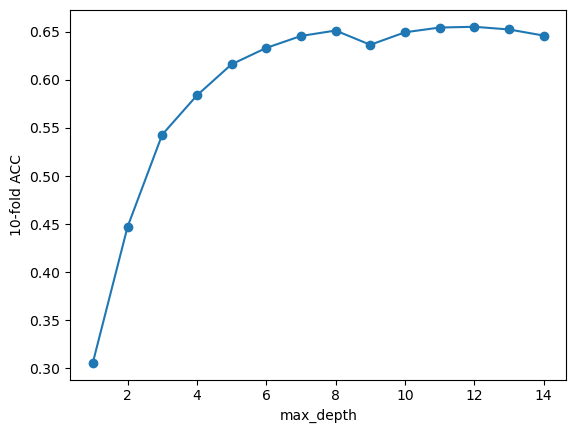

In [2212]:
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=20, max_features='sqrt'), param_grid=tuned_parameters,cv=10, verbose=1) 
grid.fit(X_train_RF, y_train_RF)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

El mejor resultado me lo da con 12.

In [2214]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
#print("Test: ",bagModel.score(X_test,y_test))

Train:  0.9624604251469923


Me parece un resultado muy alto. Veremos con el test. 

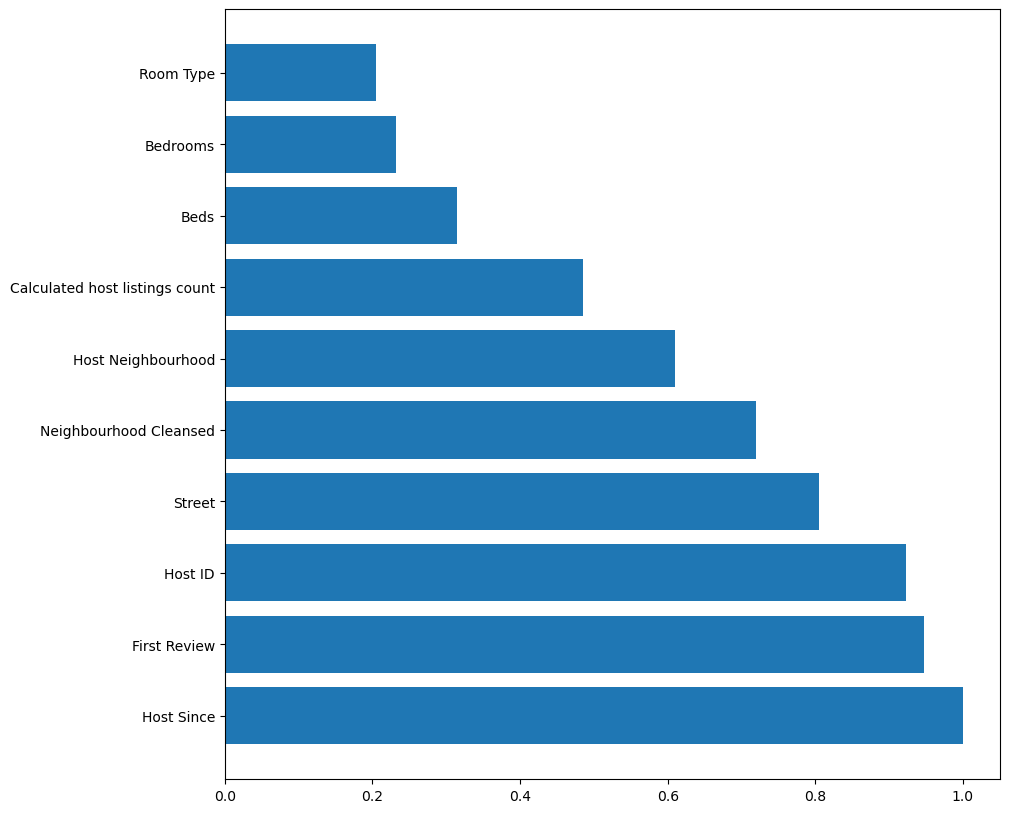

In [2217]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names_RF[indices])
plt.show()

Parece que el precio es determinado, primero por la experiencia y las primeras evaluaciones, seguido por su ubicación y el número de camas. 

## TEST!!!!

## 8. Test. 

Ahora repetiré unicamente los cambios realizados en Train, sin comentarios, hasta la comparación de los resultados y el análisis del overfitting. 

In [2376]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

In [2377]:
df_test.shape

(2655, 89)

In [2378]:
lista_columnas = list(df_test.columns.values)
print("La lista inicial de las columnas de train es --> ", lista_columnas)

La lista inicial de las columnas de train es -->  ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests

primero, elimino la columna de "Country", pues no aporta nada en este análisis --> 

In [2379]:
i = "Country"
print("Valido que 'Country' se encuentra en la lista_columnas - original - \n")
if i in lista_columnas:
    print("Sí Existe\n")
else:
    print("No Existe\n")
df_test = df_test.drop('Country', axis=1)
lista_columnas = list(df_test.columns.values)
print("\nLa nueva lista de columnas es --> \n \n", lista_columnas, "\n")
if i in lista_columnas:
    print("Sí Existe\n")
else:
    print("No Existe\n")

Valido que 'Country' se encuentra en la lista_columnas - original - 

Sí Existe


La nueva lista de columnas es --> 
 
 ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', '

Ahora, eliminaré la siguiente lista de columnas, que tienen menos del más del 30% de NAs

In [2380]:
df_test.drop(['Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 'Host Acceptance Rate', 'Neighbourhood', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names'], axis = 1, inplace=True)

In [2381]:
print("Verifico si alguno de las columnas existe aún --> ")
print("El tamaño de original de la lista de columnas es ", len(lista_columnas))
lista_columnas = list(df_test.columns.values)
print("El tamaño nuevo de la lista de columnas es ", len(lista_columnas))
print(df_test.shape)
for i in ['Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 'Host Acceptance Rate', 'Neighbourhood', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names']:
    if i in lista_columnas:
        print(i, "está en la lista!!! \n")
    else:
        print(i, "se ha borrado de la lista --> OK \n")

Verifico si alguno de las columnas existe aún --> 
El tamaño de original de la lista de columnas es  88
El tamaño nuevo de la lista de columnas es  71
(2655, 71)
Neighborhood Overview se ha borrado de la lista --> OK 

Notes se ha borrado de la lista --> OK 

Transit se ha borrado de la lista --> OK 

Access se ha borrado de la lista --> OK 

Interaction se ha borrado de la lista --> OK 

House Rules se ha borrado de la lista --> OK 

Host About se ha borrado de la lista --> OK 

Host Acceptance Rate se ha borrado de la lista --> OK 

Neighbourhood se ha borrado de la lista --> OK 

Square Feet se ha borrado de la lista --> OK 

Weekly Price se ha borrado de la lista --> OK 

Monthly Price se ha borrado de la lista --> OK 

Security Deposit se ha borrado de la lista --> OK 

Cleaning Fee se ha borrado de la lista --> OK 

Has Availability se ha borrado de la lista --> OK 

License se ha borrado de la lista --> OK 

Jurisdiction Names se ha borrado de la lista --> OK 



Ahora voy a confirmar que los datos de las filas con los siguientes valores en "Market" --> nan, 'Toledo', 'Other (International)', 'London', 'Deauville', 'Barcelona', 'Mallorca Island' se borraron en el paso donde filtré Madrid

In [2382]:
np.unique(df_test['Market'])

array(['Madrid'], dtype=object)

Voy a arreglar los códigos postales -->

DataFrame.replace(to_replace=None, value=_NoDefault.no_default, *, inplace=False, limit=None, regex=False, method=_NoDefault.no_default)

* Los que inician con '0' no son de Madrid
* Los códigos 46370, 84084,03430, 07320, probablemente no son de Madrid --> Se borrarán
* 28002\n28002 debe reemplazarse por 28002
* 2802\n28012 debe reemplazarse por 28012
* 28051\n28051 debe reemplazarse por 28051
* 280013 debe reemplazarse por 28013
* 28 es un error se elimina
* 08015 parece 28015
* 2015 y 2805 probablemente son 28015
* 2804 probablemente es 28004
* 28051\n28051 debe reemplazarse por 28051
* 29012 debe ser 28012
* 27013 debe ser 28013
* 20013 debe ser 28013
* 20126 debe ser 28126
* 27004 debe ser 28004
* Hay que eliminar un '-'
* 2815 debe ser 28015
* Madrid 28004 debe ser 28004
* 10100 debe ser 28100
* Pondré toda la columna como int
* Eliminaré todos los NA

In [2383]:
df_test['Zipcode'] = df_test['Zipcode'].replace({'28002\n28002':28002, '2802\n28012':28012, '08015':28015, '28051\n28051':28051, 'Madrid 28004':28004}, inplace=False)

In [2384]:
df_test=df_test.dropna(subset=['Zipcode'])

In [2385]:
df_test = df_test.drop(df[df.Zipcode == '-'].index)

In [2386]:
df_test = df_test.astype({'Zipcode':'int'})

In [2387]:
df_test['Zipcode'] = df_test['Zipcode'].replace({25008: 28008, 2805:28015, 280013:28013, 2015:28015, 2805:28015, 2804:28004, 29012:28012, 27013:28013, 2815:28015, 10100:28100, 20013: 28013, 20126: 28126, 27004: 28004, 29230:28830}, inplace=False)

In [2388]:
np.unique(df_test.Zipcode)

array([28001, 28002, 28003, 28004, 28005, 28006, 28007, 28008, 28009,
       28010, 28011, 28012, 28013, 28014, 28015, 28016, 28017, 28018,
       28019, 28020, 28021, 28022, 28023, 28024, 28025, 28026, 28027,
       28028, 28029, 28030, 28031, 28032, 28033, 28034, 28035, 28036,
       28037, 28038, 28039, 28040, 28041, 28042, 28043, 28044, 28045,
       28046, 28047, 28050, 28051, 28053, 28054, 28055, 28094])

In [2389]:
df_test = df_test.drop(df[df.Zipcode == 28].index)

In [2390]:
df_test = df_test.drop(df[df.Zipcode > 30000].index)

In [2391]:
df_test = df_test.drop(df[df.Zipcode == 3430].index)

In [2392]:
df_test = df_test.drop(df[df.Zipcode == 7320].index)

In [2393]:
np.unique(df_test.Zipcode)

array([28001, 28002, 28003, 28004, 28005, 28006, 28007, 28008, 28009,
       28010, 28011, 28012, 28013, 28014, 28015, 28016, 28017, 28018,
       28019, 28020, 28021, 28022, 28023, 28024, 28025, 28026, 28027,
       28028, 28029, 28030, 28031, 28032, 28033, 28034, 28035, 28036,
       28037, 28038, 28039, 28040, 28041, 28042, 28043, 28044, 28045,
       28046, 28047, 28050, 28051, 28053, 28054, 28055, 28094])

### Ahora analizo de la estructura de mi dataframe


In [2394]:
df_test.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                      object
Host Response Time                 object
Host Response Rate                float64
Host Thumbnail Url                 object
Host Picture Url                   object
Host Neighbourhood                 object
Host Listings Count               

In [2395]:
lista_columnas = list(df_test.columns.values)
len(lista_columnas)

71

Ahora elimino las variables que pudieran ser redundantes, pues apuntan a la misma información. 'Name' no sigue un formato único, por lo que es probable que todas las entradas sean ligeramente distintas, funcionaría igual que 'ID'. La información de Scrape es externa, no aporta tampoco. Por ejemplo, ID está relacionado con nombre. Los datos del Host no son relevantes, salvo los que tengan que ver con la propiedad, como sería Host Response Time, Host Since (experiencia), Host Verifications y el Host ID. Igualmente, las URL que apuntan a la propiedad o las de las imágenes (que no se vana a tratar en este análisis), al ser dentro de airbnb, probablemente, no aporten información relevante. Voy a mantener de momento todas las Neighbourhood, que parecen redundantes, pero tienen información distintaa, para analizarlas un poco más. También elimino Country Code, pues todos están en España. Elimino todos estos. Mantengo todas las Review Scores, pues son evaluaciones de distintos factores por parte de los usuarios. Alguno de los factores podría ser más valorado que otro.  

En resumen, elimino Listing Url, Summary, Space, Description, Host Response Rate y Host Picture Url. 

In [2396]:
df_test.drop(['Name', 
 'Listing Url',
 'Scrape ID',
 'Last Scraped',
 'Summary',
 'Space',
 'Description',
 'Host Response Rate',
 'Host Picture Url', 
 'Thumbnail Url',
 'Medium Url',
 'Picture Url',
 'XL Picture Url', 
 'Host URL', 
 'Host Name', 
 'Host Location', 
 'Host Thumbnail Url',
 'Country Code'], axis = 1, inplace=True)

In [2397]:
lista_columnas = list(df_test.columns.values)
len(lista_columnas)

53

Ya he reducido de 89 columnas en la base original de Madrid a 53. 

## 8.1. Ahora, voy a revisar la variable objetivo --> Precio

Voy a analizar un poco mi variable objetivo (Precio):

In [2398]:
df_test['Price'].isnull().any()

True

In [2399]:
Price_NA_count = {"Columna": 'Price', 'NA': df_test['Price'].isna().sum(), 'NA%': (df_test['Price'].isna().sum()*100/data.shape[0]).round(2)}
Price_NA_count

{'Columna': 'Price', 'NA': 2, 'NA%': 0.02}

In [2400]:
df_test = df_test[df_test['Price'].notna()]

In [2401]:
df_test['Price'].isnull().any()

False

In [2402]:
df_test['Price'].dtypes

dtype('float64')

## 8.2. Ahora, voy a codificar las variables que no tienen número

Primero, clasifico por tipo de variable todos las columnas:

In [2403]:
var_types = df_test.columns.to_series().groupby(df_test.dtypes).groups
var_types

{int64: ['ID', 'Host ID', 'Zipcode', 'Accommodates', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews'], float64: ['Host Listings Count', 'Host Total Listings Count', 'Latitude', 'Longitude', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Calculated host listings count', 'Reviews per Month'], object: ['Experiences Offered', 'Host Since', 'Host Response Time', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Market', 'Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review', 'Cancellation Policy', 'Geolocation', 'Features']}

Esta es la lista de variables tipo object: 


['Experiences Offered', 'Host Since', 'Host Response Time', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Market', 'Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review', 'Cancellation Policy', 'Geolocation', 'Features']

In [2404]:
var_object = list(df_test.select_dtypes(include='object'))

In [2405]:
var_object

['Experiences Offered',
 'Host Since',
 'Host Response Time',
 'Host Neighbourhood',
 'Host Verifications',
 'Street',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'State',
 'Market',
 'Smart Location',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Amenities',
 'Calendar Updated',
 'Calendar last Scraped',
 'First Review',
 'Last Review',
 'Cancellation Policy',
 'Geolocation',
 'Features']

Voy a codificar ahora utilizando la media de cada valor en relación con el precio --> 

In [2406]:
Recuperar = df_test

In [2409]:
t_enc=ce.TargetEncoder() 
df_test
for to_encode in var_object:
    ##print(to_encode, ", ")
    df_encoded=t_enc.fit_transform(df_test[to_encode],df_test['Price'])
    df_test = df_encoded.join(df_test.drop(to_encode,axis = 1))

#### Mantengo separadas df y df_new_train para poder regresar a la información tratada antes de codificar.

In [2346]:
Recuperar = df_test

In [2410]:
df_test.head().T

,0,1,2,3,4
Features,7.790476e+01,7.280788e+01,6.670021e+01,6.670021e+01,7.790476e+01
Geolocation,6.715950e+01,6.208527e+01,6.364657e+01,6.507776e+01,7.496601e+01
Cancellation Policy,6.454791e+01,7.712112e+01,6.454791e+01,7.712112e+01,7.712112e+01
Last Review,6.294789e+01,6.690251e+01,6.364657e+01,8.053887e+01,6.846666e+01
First Review,7.335806e+01,6.427558e+01,6.364657e+01,6.726320e+01,6.709205e+01
Calendar last Scraped,6.839366e+01,7.072628e+01,6.839366e+01,7.072628e+01,6.839366e+01
Calendar Updated,8.823977e+01,6.778836e+01,6.413833e+01,8.823977e+01,8.823977e+01
Amenities,6.715950e+01,6.208527e+01,6.364657e+01,6.507776e+01,7.496601e+01
Bed Type,6.959167e+01,6.959167e+01,6.959167e+01,6.959167e+01,6.959167e+01
Room Type,8.838662e+01,3.914542e+01,3.914542e+01,8.838662e+01,8.838662e+01


In [2411]:
df_test.shape

(2566, 53)

¿Cuántas filas tienen valores NULL?

In [2412]:
print ("De un total de ",df_test.shape[0], " columnas, hay ", df_test.dropna().shape[0], "columnas con valores válidos")
print ("Esto equivale al ", round(df_test.dropna().shape[0] * 100/ df_test.shape[0],2), "% de sus información es válida")


De un total de  2566  columnas, hay  2029 columnas con valores válidos
Esto equivale al  79.07 % de sus información es válida


Voy a rellenar las variables que se tengan NA con la moda de cada columna. 

In [2413]:
for name in lista_columnas:
    df_test[name].fillna(df_test[name].mode()[0], inplace=True)

Verifico ahora, nuevamente, cuántos NA me quedan --> 

In [2414]:
print ("De un total de ",df_test.shape[0], " columnas, hay ", df_test.dropna().shape[0], "columnas con valores SIN NULL")
print ("Esto equivale al ", round(df_test.dropna().shape[0] * 100/ df_test.shape[0],2), "% tienen valor")

De un total de  2566  columnas, hay  2566 columnas con valores SIN NULL
Esto equivale al  100.0 % tienen valor


## 8.3. Regularización de los datos 

Me aseguro que Precio es mi primer columna -->

In [2415]:
primera_columna = df_test.pop('Price')

In [2416]:
df_test.insert(0, 'Price', primera_columna)

In [2417]:
print("Verifico que Precio es la primer columna --> ")
df_test.head(2)

Verifico que Precio es la primer columna --> 


,Price,Features,Geolocation,Cancellation Policy,Last Review,First Review,Calendar last Scraped,Calendar Updated,Amenities,Bed Type,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,55.0,77.904762,67.159497,64.547912,62.947891,73.358063,68.393656,88.239766,67.159497,69.591673,...,16,81.0,9.0,8.0,9.0,9.0,10.0,8.0,48.0,2.65
1,16.0,72.807876,62.085266,77.121118,66.902506,64.275579,70.726283,67.788360,62.085266,69.591673,...,10,92.0,9.0,10.0,10.0,10.0,8.0,9.0,2.0,0.64


In [2418]:
df_test.drop(['Host Listings Count', 
            'Host Total Listings Count',
            'Availability 60', 
            'Availability 90',
            'State', 'City', 'Accommodates'], axis = 1, inplace=True)

In [2419]:
df_test.drop(['Review Scores Rating'], axis = 1, inplace=True)

In [2420]:
df_test.drop(['Experiences Offered'], axis = 1, inplace=True)

In [2421]:
df_test.drop(['Calendar last Scraped', 'Market', 'Geolocation'], axis = 1, inplace=True)

In [2422]:
df_test.drop(['Smart Location'], axis = 1, inplace=True)

In [2423]:
df_test.drop(['ID'], axis = 1, inplace=True)

In [2424]:
df_test = df_new[df_new['Maximum Nights'] < 1125]

In [2425]:
df_test = df_new[df_new['Minimum Nights'] < 100]

In [2426]:
df_test = df_new[df_new['Extra People'] < 15]

In [2526]:
df_regresiones_test = df_test
df_test.shape

(549, 39)

### PARA RECUPÉRAR LOS VALORES DE DF_NEW !!!!!

## 8.4. Regresión Lasso

Contrasto los resultados en Lasso Train vs Test


Primero divido en y y X -->

In [2633]:
df_test = df_regresiones_test
df_new = df_regresiones
print("Test -->", df_test.shape, "Train --> ", df_new.shape)

Test --> (549, 39) Train -->  (2211, 39)


In [2634]:
data2 = df_new.values
y_train = data2[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data2[:,1:]      # nos quedamos con el resto
feature_names = df_new.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [2635]:
df_test = df_test.drop(['Amenities'], axis=1)
df_new = df_new.drop(['Amenities'], axis=1)

Las elimino de los datos -->

In [2636]:
df_test = df_test.drop(['Review Scores Location', 'Review Scores Value', 'Maximum Nights', 'Longitude', 
                        'Latitude', 'Host Response Time', 'Host Verifications', 'Property Type'], axis = 1)
df_new = df_new.drop(['Review Scores Location', 'Review Scores Value', 'Maximum Nights', 'Longitude', 
                        'Latitude', 'Host Response Time', 'Host Verifications', 'Property Type'], axis = 1)

In [2637]:
print("Me quedo para continuar con ", len(df_new.columns), "variables.")
print("Las variables son --> ", df_new.columns)
print("Test -->", df_test.shape, "Train --> ", df_new.shape)
      

Me quedo para continuar con  30 variables.
Las variables son -->  Index(['Price', 'Features', 'Cancellation Policy', 'Last Review',
       'First Review', 'Calendar Updated', 'Bed Type', 'Room Type',
       'Neighbourhood Group Cleansed', 'Neighbourhood Cleansed', 'Street',
       'Host Neighbourhood', 'Host Since', 'Host ID', 'Zipcode', 'Bathrooms',
       'Bedrooms', 'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365', 'Number of Reviews',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')
Test --> (549, 30) Train -->  (2211, 30)


#### Resetear df_new con valores de Lasso

In [2638]:
Recuperar_lasso = df_new
Recuperar_lasso_test = df_test

In [2639]:
df_new = Recuperar_lasso
df_test = Recuperar_lasso_test
df_test.shape

(549, 30)

In [2640]:
features_result = ['Price','First Review','Room Type','Neighbourhood Cleansed','Street','Host Neighbourhood','Host Since','Host ID',
                   'Bedrooms','Beds','Calculated host listings count']
df_test = df_test[features_result]
print(df_test.shape)
df_new = df_new[features_result]
print(df_new.shape)

    


(549, 11)
(2211, 11)


Voy a correr Lasso una vez más, para ver cómo se comporta con las variables que he elegido -->

In [2604]:
data2 = df_new.values
y_train = data2[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data2[:,1:]      # nos quedamos con el resto
feature_names = df_new.columns[1:]

data2_test = df_test.values
y_test = data2_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data2_test[:,1:]      # nos quedamos con el resto
feature_names = df_test.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

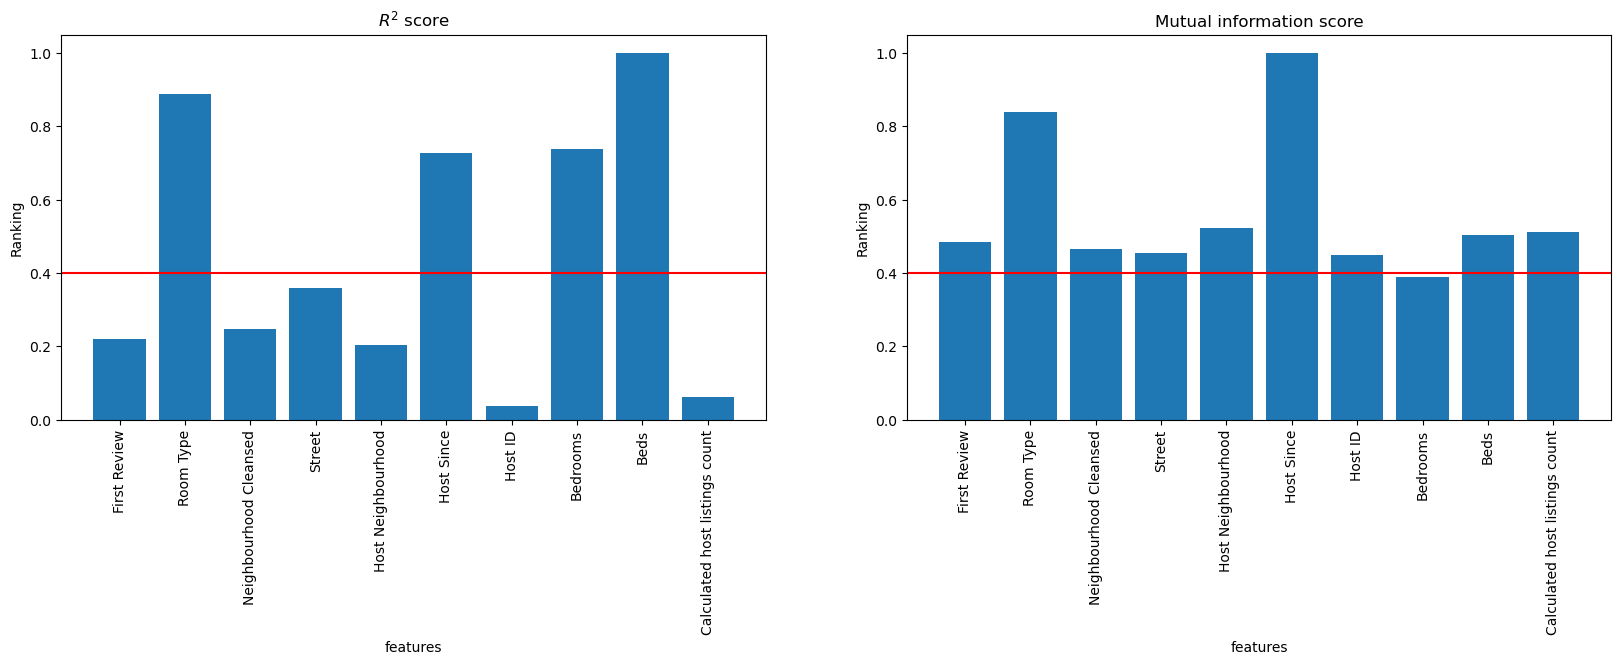

In [2605]:
# do calculations
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.axhline(y=0.4, color='r', linestyle='-')
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.axhline(y=0.4, color='r', linestyle='-')
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Parece que en Train las variables elegidas tienen un buen comportamiento! 


best mean cross-validation score: -885.976
best parameters: {'alpha': 0.1}


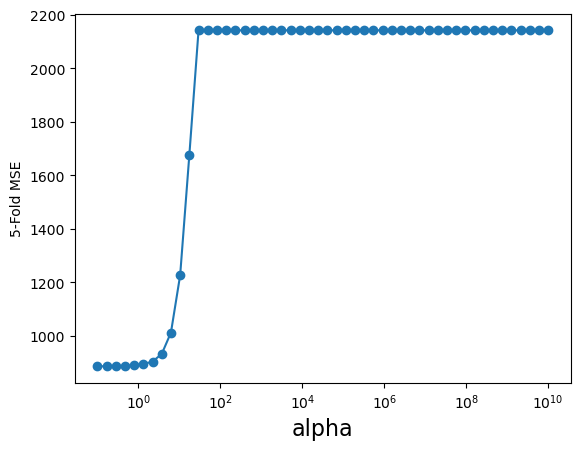

In [2606]:
alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 100)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [2607]:
df_new.describe()

,Price,First Review,Room Type,Neighbourhood Cleansed,Street,Host Neighbourhood,Host Since,Host ID,Bedrooms,Beds,Calculated host listings count
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2.211000e+03,2211.000000,2211.000000,2211.000000
mean,58.990954,68.056229,64.928783,66.546803,65.658977,65.875027,67.105042,3.658653e+07,1.185889,1.713252,4.600181
std,46.275331,6.438547,24.471573,16.625377,14.627452,15.461675,9.856504,3.659737e+07,0.731514,1.181724,10.477741
min,9.000000,52.371366,32.459609,30.552038,36.344369,34.831776,24.687058,1.985400e+04,0.000000,1.000000,1.000000
25%,30.000000,63.254767,37.877328,56.939689,57.778555,61.183024,62.413309,5.239042e+06,1.000000,1.000000,1.000000
50%,49.000000,66.591159,86.933147,67.311086,63.813278,61.911801,65.128924,2.251376e+07,1.000000,1.000000,1.000000
75%,74.000000,72.567968,86.933147,78.889571,74.730878,82.227072,68.794919,6.022011e+07,1.000000,2.000000,4.000000
max,525.000000,107.440424,86.933147,139.121553,130.300263,110.651854,213.268155,1.247534e+08,10.000000,16.000000,145.000000


In [2608]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 858
MSE Modelo Lasso (test) : 1.13e+03
RMSE Modelo Lasso (train): 29.3
RMSE Modelo Lasso (test) : 33.6
First Review 7.317506367687012
Room Type 12.65220833913529
Neighbourhood Cleansed 1.3251010538375505
Street 6.38727983405063
Host Neighbourhood 0.6089541668698184
Host Since 12.83259036578649
Host ID -1.536598923328068
Bedrooms 11.68349171493401
Beds 8.046924160227247
Calculated host listings count -1.93850561939716


El resultado muestra un poco de overfitting. Puede ser mejorado!

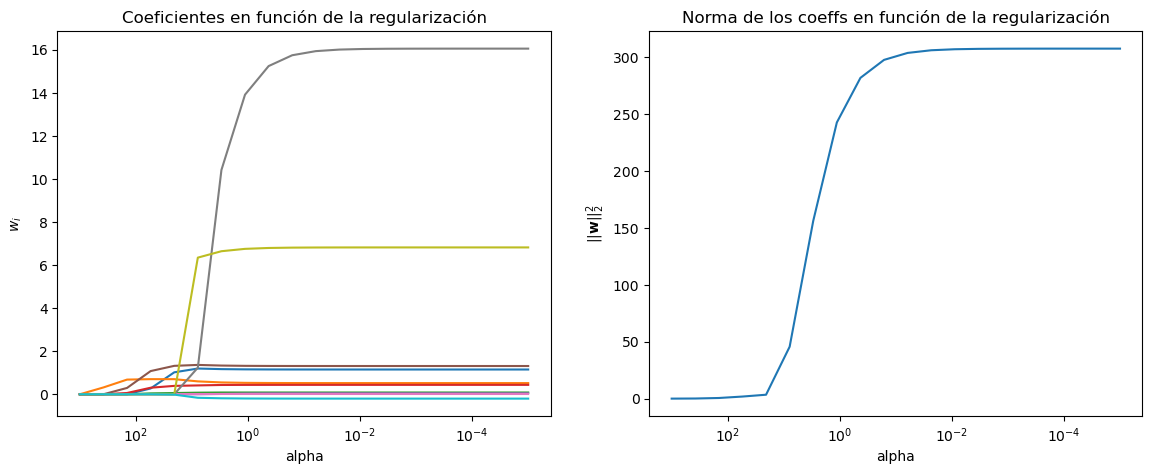

In [2613]:
n_alphas = 20
alphas = np.logspace(-5, 3, n_alphas)
# ...
coefs = []

norm2_coefs = []
for a in alphas:
    #### TU CÓDIGO AQUÍ
    lasso = Lasso(alpha = a).fit(X_train,y_train)
    
    #####
    coefs.append(lasso.coef_)
    norm2_coefs.append(np.dot(lasso.coef_,lasso.coef_.T))

# Display results
plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$w_i$')
plt.title('Coeficientes en función de la regularización')
plt.axis('tight')


ax = plt.subplot(1, 2, 2)
ax.plot(alphas, norm2_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$||\mathbf{w}||^2_2$')
plt.title('Norma de los coeffs en función de la regularización')
plt.axis('tight')
plt.show()

En principio, se podría obtener una buena aproximación con 4 variables. 

## El error se ha incrementado a 30,5€, sin embargo, se ha reducido mucho la complejidad. 


In [2616]:
print("El número de variables restante es ", len(df_new.columns.values))


El número de variables restante es  11


## 8.5. Regresión Lineal 

Ahora voy a intentar obtener el modelo en base a una regresión lineal. 

Voy a iniciar con las 11 variables (incluyendo 'Price') que tenía al final de Lasso --> 

In [2655]:
df_new = df_regresiones[['Price', 'First Review', 'Room Type', 'Neighbourhood Cleansed', 'Street',
 'Host Neighbourhood', 'Host Since', 'Host ID', 'Bedrooms', 'Beds',
 'Calculated host listings count']]
df_test = df_regresiones_test[['Price', 'First Review', 'Room Type', 'Neighbourhood Cleansed', 'Street',
 'Host Neighbourhood', 'Host Since', 'Host ID', 'Bedrooms', 'Beds',
 'Calculated host listings count']]

In [2656]:
df_test.shape

(549, 11)

In [2675]:
df_prueba = df_new
linear_vars = df_prueba.columns
data_linear = df_prueba.values

df_prueba_test = df_test
linear_vars_test = df_prueba_test.columns
data_linear_test = df_prueba_test.values

In [2676]:
y_train_linear = data_linear[:,0:1]     # nos quedamos con la 1ª columna, price
X_train_linear = data_linear[:,1:]      # nos quedamos con el resto
feature_names_linear = linear_vars[1:]

y_test_linear = data_linear_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test_linear = data_linear_test[:,1:]      # nos quedamos con el resto
feature_names_linear_test = linear_vars[1:]

In [2677]:
feature_names_linear

Index(['First Review', 'Room Type', 'Neighbourhood Cleansed', 'Street',
       'Host Neighbourhood', 'Host Since', 'Host ID', 'Bedrooms', 'Beds',
       'Calculated host listings count'],
      dtype='object')

In [2678]:

poly = PolynomialFeatures(X_train_linear.shape[1])
X = poly.fit_transform(X_train_linear.reshape(-1, 1))
lr = LinearRegression().fit(X_train_linear,y_train_linear)

X_test = poly.fit_transform(X_test_linear.reshape(-1, 1))

lr_test = LinearRegression().fit(X_test_linear,y_test_linear)

y_hat = lr.predict(X_train_linear)
y_hat_test = lr.predict(X_test_linear)

error_train = np.mean(np.power(y_train_linear-y_hat,2))
error_test = np.mean(np.power(y_test_linear-y_hat_test,2))

for number in range(len(feature_names_linear)):
    print(feature_names_linear[number], lr.coef_[0,number])

print("El MSE train es -->", error_train)
print("El MSE test es -->", error_test)
print("El error esperado TRAIN es de ", np.sqrt(error_train))
print("El error esperado TEST es de ", np.sqrt(error_test))

First Review 1.1499795272498285
Room Type 0.5191355190463188
Neighbourhood Cleansed 0.08160232386175507
Street 0.4372637644240455
Host Neighbourhood 0.042526457617751715
Host Since 1.3122979618007342
Host ID -4.491413352347706e-08
Bedrooms 16.051390857880566
Beds 6.819345991175565
Calculated host listings count -0.2021750287525426
El MSE train es --> 857.4703730340933
El MSE test es --> 1127.659372063148
El error esperado TRAIN es de  29.282595052933633
El error esperado TEST es de  33.58063983999036


Parece bueno, pero me parece que se puede mejorar. Voy a eliminar las variables con coeficientes menores a 0.1. Voy a trabajar con las que me resten, a ver qué resultado me da. 

Ahora, voy a reducir el número de variables para quedarme con las que tienen coeficientes iguales o superiores a 0.1 -->

In [2679]:
coeficiente_condicion = pd.Series(lr.coef_[0,] >= 0.1)
coeficientes_valiosos = feature_names_linear[coeficiente_condicion].values
list(coeficientes_valiosos)

['First Review', 'Room Type', 'Street', 'Host Since', 'Bedrooms', 'Beds']

In [2680]:
df_prueba = df_new[['Price', 'First Review', 'Room Type', 'Street', 'Host Since', 'Bedrooms', 'Beds']]
df_prueba_test = df_test[['Price', 'First Review', 'Room Type', 'Street', 'Host Since', 'Bedrooms', 'Beds']]
df_prueba_test.head()

,Price,First Review,Room Type,Street,Host Since,Bedrooms,Beds
5,92.0,81.088176,88.386624,67.105143,72.803424,1.0,1.0
7,80.0,67.591360,88.386624,64.951351,70.412209,1.0,1.0
8,30.0,64.035445,39.145416,73.050222,62.802660,1.0,1.0
9,38.0,81.088176,39.145416,64.951351,66.144251,1.0,1.0
13,37.0,83.943673,88.386624,62.336323,64.817544,3.0,6.0


In [2681]:

linear_vars = df_prueba.columns
data_linear = df_prueba.values


linear_vars_test = df_prueba_test.columns
data_linear_test = df_prueba_test.values

In [2682]:
y_train_linear = data_linear[:,0:1]     # nos quedamos con la 1ª columna, price
X_train_linear = data_linear[:,1:]      # nos quedamos con el resto
feature_names_linear = linear_vars[1:]

y_test_linear = data_linear_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test_linear = data_linear_test[:,1:]      # nos quedamos con el resto
feature_names_linear_test = linear_vars[1:]

In [2685]:

poly = PolynomialFeatures(X_train_linear.shape[1])
X = poly.fit_transform(X_train_linear.reshape(-1, 1))
lr = LinearRegression().fit(X_train_linear,y_train_linear)

X_test = poly.fit_transform(X_test_linear.reshape(-1, 1))

lr_test = LinearRegression().fit(X_test_linear,y_test_linear)

y_hat = lr.predict(X_train_linear)
y_hat_test = lr.predict(X_test_linear)

error_train = np.mean(np.power(y_train_linear-y_hat,2))
error_test = np.mean(np.power(y_test_linear-y_hat_test,2))

for number in range(len(feature_names_linear)):
    print(feature_names_linear[number], lr.coef_[0,number])

print("El MSE train es -->", error_train)
print("El MSE test es -->", error_test)
print("El error esperado TRAIN es de ", np.sqrt(error_train))
print("El error esperado TEST es de ", np.sqrt(error_test))

First Review 1.1276478959866647
Room Type 0.5210182288808789
Street 0.5397864843960728
Host Since 1.2561349249429434
Bedrooms 16.130490176046262
Beds 6.870795475063875
El MSE train es --> 864.3874867027874
El MSE test es --> 1140.896422146692
El error esperado TRAIN es de  29.4004674572155
El error esperado TEST es de  33.77715828998485


Este parece aceptable. Se ve un poco de overfitting. 

### 8.6. Clasificar usando Random Forest

Parto, en el training original, me salieron valores bastante malos. Voy a intentar con todas las variables después de normalización (39), a ver si mejoran los resultados. 

In [2699]:
df_new = df_regresiones
df_test = df_regresiones_test

In [2701]:
print("TRAIN --> ", df_new.shape)
print("TEST --> ", df_test.shape)

TRAIN -->  (2211, 39)
TEST -->  (549, 39)


In [2702]:
RF_vars = df_new.columns
RF_vars.shape
data_RF = df_new.values

In [2703]:
y_train_RF = data_RF[:,0:1]     # nos quedamos con la 1ª columna, price
X_train_RF = data_RF[:,1:]      # nos quedamos con el resto
feature_names_RF = RF_vars[1:]

In [2704]:
N,Nfeatures = X_train.shape

rf = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=20,max_features='sqrt')
kf  = KFold(n_splits=10, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(X_train_RF):
        
        Xt = X_train_RF[idxTrain,:]
        yt = y_train_RF[idxTrain]
        Xv = X_train_RF[idxVal,:]
        yv = y_train_RF[idxVal]
        
        rf.fit(Xt,yt)
        
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt[:,selected]
        
        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

# features 1 error 0.184525702172761 +/- 0.01646256118136288
# features 2 error 0.3079960050548286 +/- 0.020123021706819556
# features 3 error 0.45318780318780316 +/- 0.028223774976599125
# features 4 error 0.31524601524601525 +/- 0.026431919880435212
# features 5 error 0.3722290163466634 +/- 0.023845011009336777
# features 6 error 0.44415433533080595 +/- 0.014600366358334707
# features 7 error 0.5196751049692226 +/- 0.024410827621008307
# features 8 error 0.5594716888834536 +/- 0.034631768187940955
# features 9 error 0.4595287595287596 +/- 0.038494895353336424
# features 10 error 0.49567689861807507 +/- 0.033307213433912776
# features 11 error 0.5192083486201133 +/- 0.030217243719228525


El error parece más aceptable, aunque sigue siendo malo. Tengo que hacer mucho trabajo aún aquí. 

In [2705]:
print("El número de variables, incluyendo Price es de --> ", len(feature_names_RF))
feature_names_RF


El número de variables, incluyendo Price es de -->  38


Index(['Features', 'Cancellation Policy', 'Last Review', 'First Review',
       'Calendar Updated', 'Amenities', 'Bed Type', 'Room Type',
       'Property Type', 'Neighbourhood Group Cleansed',
       'Neighbourhood Cleansed', 'Street', 'Host Verifications',
       'Host Neighbourhood', 'Host Response Time', 'Host Since', 'Host ID',
       'Zipcode', 'Latitude', 'Longitude', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 30', 'Availability 365', 'Number of Reviews',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

Fitting 10 folds for each of 14 candidates, totalling 140 fits
best mean cross-validation score: 0.813
best parameters: {'max_depth': 9}


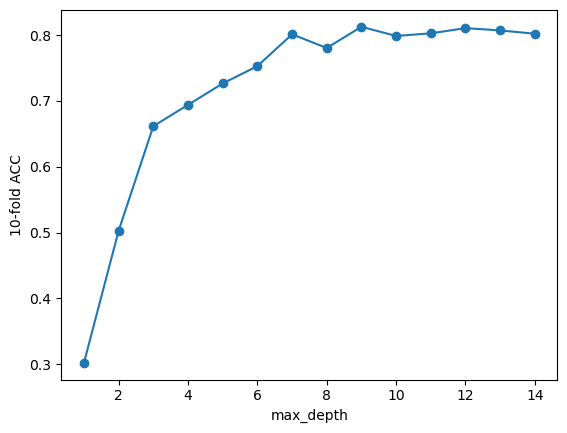

In [2706]:
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=20, max_features='sqrt'), param_grid=tuned_parameters,cv=10, verbose=1) 
grid.fit(X_train_RF, y_train_RF)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

El mejor resultado lo da con 7, nmenor complejidad y un nivel de 0.8, se ve positivo. 

El mejor resultado me lo da con 12.

Me parece un resultado muy alto. Veremos con el test. 

Parece que el precio es determinado, primero por la experiencia y las primeras evaluaciones, seguido por su ubicación y el número de camas. 

Los resultados parecen indicar, para mi sorpresa, que el "Host", resulta muy importante en la determinación del "Precio". Cosa que si se analiza con detalle, es lógica. 

También, el precio, se explica en buena medida con la ubicación (calle y Barrio), además de por el número de camas. 

Considero que de todos los modelos, el más prometedor 